In [1]:
cd C:\Users\harsha.teja\Desktop\myg\major project\Data-Science-Capstone-Projects-master\Data-Science-Capstone-Projects-master\Project_2\Project 2\Healthcare - Diabetes

C:\Users\harsha.teja\Desktop\myg\major project\Data-Science-Capstone-Projects-master\Data-Science-Capstone-Projects-master\Project_2\Project 2\Healthcare - Diabetes


#                          # Capstone_Project_by_Harsha Teja Bolla

# Healthcare
Project 2 

DESCRIPTION

Problem Statement
NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Build a model to accurately predict whether the patients in the dataset have diabetes or not.
Dataset Description
The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

 

Variables	Description
Pregnancies	Number of times pregnant
Glucose	Plasma glucose concentration in an oral glucose tolerance test
BloodPressure	Diastolic blood pressure (mm Hg)
SkinThickness	Triceps skinfold thickness (mm)
Insulin	Two hour serum insulin
BMI	Body Mass Index
DiabetesPedigreeFunction	Diabetes pedigree function
Age	Age in years
Outcome	Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0
Project Task: Week 1
Data Exploration:

1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

• Glucose

• BloodPressure

• SkinThickness

• Insulin

• BMI

2. Visually explore these variables using histograms. Treat the missing values accordingly.

3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

Project Task: Week 2
Data Exploration:

1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

3. Perform correlation analysis. Visually explore it using a heat map.

 

Project Task: Week 3
Data Modeling:

1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

 

Project Task: Week 4

Data Modeling:

1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

Data Reporting:

2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a. Pie chart to describe the diabetic or non-diabetic population

b. Scatter charts between relevant variables to analyze the relationships

c. Histogram or frequency charts to analyze the distribution of the data

d. Heatmap of correlation analysis among the relevant variables

e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor


from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)
pd.set_option('display.width', 1000)

import sklearn
import datetime

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import pickle

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)
from IPython.display import display
%matplotlib inline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [3]:
df = pd.read_csv('health care diabetes.csv')

In [4]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0  33.6                     0.627   50        1
1            1       85             66             29        0  26.6                     0.351   31        0
2            8      183             64              0        0  23.3                     0.672   32        1
3            1       89             66             23       94  28.1                     0.167   21        0
4            0      137             40             35      168  43.1                     2.288   33        1

In [5]:
df_name=df.columns

In [6]:
df_name


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], dtype='object')

In [7]:
def missing_data(data):
    total = df.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [8]:
%%time
missing_data(df)

Wall time: 508 ms


Pregnancies Glucose BloodPressure SkinThickness Insulin      BMI DiabetesPedigreeFunction    Age Outcome
Total             0       0             0             0       0        0                        0      0       0
Percent           0       0             0             0       0        0                        0      0       0
Types         int64   int64         int64         int64   int64  float64                  float64  int64   int64

In [9]:
pd.DataFrame(df.dtypes, columns=['Type']).T

Pregnancies Glucose BloodPressure SkinThickness Insulin      BMI DiabetesPedigreeFunction    Age Outcome
Type       int64   int64         int64         int64   int64  float64                  float64  int64   int64

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df1 = df.copy(deep = True)
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [12]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [13]:
imp = IterativeImputer(max_iter=10000, random_state=0)

In [15]:
df = imp.fit_transform(df)

In [16]:
df = pd.DataFrame(df, columns =df_name)

In [17]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], dtype='object')

In [19]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
df['BloodPressure'].unique()

array([ 72.        ,  66.        ,  64.        ,  40.        ,
        74.        ,  50.        ,  72.97109368,  70.        ,
        96.        ,  92.        ,  80.        ,  60.        ,
        70.46113168,  84.        ,  30.        ,  88.        ,
        90.        ,  94.        ,  76.        ,  82.        ,
        75.        ,  58.        ,  78.        ,  68.        ,
       110.        ,  56.        ,  68.91758181,  66.39013814,
        62.        ,  85.        ,  86.        ,  48.        ,
        74.92603015,  44.        ,  66.04837015,  65.        ,
       108.        ,  55.        , 122.        ,  54.        ,
        52.        ,  66.88816872,  98.        ,  84.52764907,
       104.        ,  95.        ,  70.52789894,  70.00965745,
        71.7550297 ,  69.28049869,  72.48313715,  81.22665686,
        75.39533715,  46.        ,  65.12202444,  80.23399368,
       102.        , 100.        ,  61.        ,  67.73192482,
        63.79607723,  75.80703782,  77.44923542,  73.07

Let's investagate each fearure distribution for each out come

A fundamental task in many statistical analyses is to characterize the location and variability of a data set. A further characterization of the data includes skewness and kurtosis.

Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case

In [21]:
from scipy.stats import skew
from scipy.stats import kurtosis
def plotBarCat(df,feature,target):
    
    
    
    x0 = df[df[target]==0][feature]
    x1 = df[df[target]==1][feature]

    trace1 = go.Histogram(
        x=x0,
        opacity=0.75
    )
    trace2 = go.Histogram(
        x=x1,
        opacity=0.75
    )

    data = [trace1, trace2]
    layout = go.Layout(barmode='overlay',
                      title=feature,
                       yaxis=dict(title='Count'
        ))
    fig = go.Figure(data=data, layout=layout)

    py.iplot(fig, filename='overlaid histogram')
    
    def DescribeFloatSkewKurt(df,target):
        """
            A fundamental task in many statistical analyses is to characterize
            the location and variability of a data set. A further
            characterization of the data includes skewness and kurtosis.
            Skewness is a measure of symmetry, or more precisely, the lack
            of symmetry. A distribution, or data set, is symmetric if it
            looks the same to the left and right of the center point.
            Kurtosis is a measure of whether the data are heavy-tailed
            or light-tailed relative to a normal distribution. That is,
            data sets with high kurtosis tend to have heavy tails, or
            outliers. Data sets with low kurtosis tend to have light
            tails, or lack of outliers. A uniform distribution would
            be the extreme case
        """
        print('-*-'*25)
        print("{0} mean : ".format(target), np.mean(df[target]))
        print("{0} var  : ".format(target), np.var(df[target]))
        print("{0} skew : ".format(target), skew(df[target]))
        print("{0} kurt : ".format(target), kurtosis(df[target]))
        print('-*-'*25)
    
    DescribeFloatSkewKurt(df,target)

In [22]:
plotBarCat(df,df_name[0],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055558
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [23]:
plotBarCat(df,df_name[1],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055558
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [24]:
plotBarCat(df,df_name[2],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055558
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [25]:
plotBarCat(df,df_name[3],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055558
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [26]:
plotBarCat(df,df_name[4],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055558
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [27]:
plotBarCat(df,df_name[5],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055558
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [28]:
plotBarCat(df,df_name[6],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055558
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [29]:
plotBarCat(df,df_name[7],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055558
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [30]:
plotBarCat(df,df_name[8],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055558
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [31]:
df.shape

(768, 9)

In [32]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], dtype='object')

In [33]:
def PlotPie(df, nameOfFeature):
    labels = [str(df[nameOfFeature].unique()[i]) for i in range(df[nameOfFeature].nunique())]
    values = [df[nameOfFeature].value_counts()[i] for i in range(df[nameOfFeature].nunique())]

    trace=go.Pie(labels=labels,values=values)

    py.iplot([trace])

In [34]:
PlotPie(df,'Outcome')

<AxesSubplot:xlabel='Glucose', ylabel='Age'>

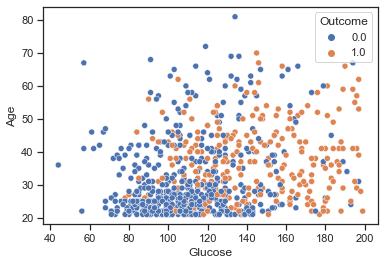

In [35]:
sns.scatterplot(x = 'Glucose',y = 'Age',hue = 'Outcome',data = df)

# Outliers investigation

In [36]:
def OutLiersBox(df,nameOfFeature):
    
    trace0 = go.Box(
        y = df[nameOfFeature],
        name = "All Points",
        jitter = 0.3,
        pointpos = -1.8,
        boxpoints = 'all',
        marker = dict(
            color = 'rgb(7,40,89)'),
        line = dict(
            color = 'rgb(7,40,89)')
    )

    trace1 = go.Box(
        y = df[nameOfFeature],
        name = "Only Whiskers",
        boxpoints = False,
        marker = dict(
            color = 'rgb(9,56,125)'),
        line = dict(
            color = 'rgb(9,56,125)')
    )

    trace2 = go.Box(
        y = df[nameOfFeature],
        name = "Suspected Outliers",
        boxpoints = 'suspectedoutliers',
        marker = dict(
            color = 'rgb(8,81,156)',
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            line = dict(
                outliercolor = 'rgba(219, 64, 82, 0.6)',
                outlierwidth = 2)),
        line = dict(
            color = 'rgb(8,81,156)')
    )

    trace3 = go.Box(
        y = df[nameOfFeature],
        name = "Whiskers and Outliers",
        boxpoints = 'outliers',
        marker = dict(
            color = 'rgb(107,174,214)'),
        line = dict(
            color = 'rgb(107,174,214)')
    )

    data = [trace0,trace1,trace2,trace3]

    layout = go.Layout(
        title = "{} Outliers".format(nameOfFeature)
    )

    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig, filename = "Outliers")
    

In [37]:
OutLiersBox(df,df_name[0])

In [38]:
OutLiersBox(df,df_name[1])

In [39]:
OutLiersBox(df,df_name[2])

In [40]:
OutLiersBox(df,df_name[3])

In [41]:
OutLiersBox(df,df_name[4])

In [42]:
OutLiersBox(df,df_name[5])

In [43]:
OutLiersBox(df,df_name[6])

In [44]:
OutLiersBox(df,df_name[7])

In [45]:
OutLiersBox(df,df_name[8])

In [46]:
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager

from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

def OutLierDetection(df,feature1,feature2,outliers_fraction=.1):
    
    new_df = df.copy()
    rng = np.random.RandomState(42)

    # Example settings
    n_samples = new_df.shape[0]
#     outliers_fraction = 0.2 # ************************************** imp
    clusters_separation = [0]#, 1, 2]

    # define two outlier detection tools to be compared
    classifiers = {
        "One-Class SVM": svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05,
                                         kernel="rbf", gamma=0.1),
        "Robust covariance": EllipticEnvelope(contamination=outliers_fraction),
        "Isolation Forest": IsolationForest(max_samples=n_samples,
                                            contamination=outliers_fraction,
                                            random_state=rng),
        "Local Outlier Factor": LocalOutlierFactor(
            n_neighbors=35,
            contamination=outliers_fraction)}

    
    xx, yy = np.meshgrid(np.linspace(new_df[feature1].min()-new_df[feature1].min()*10/100, 
                                     new_df[feature1].max()+new_df[feature1].max()*10/100, 50),
                         np.linspace(new_df[feature2].min()-new_df[feature2].min()*10/100,
                                     new_df[feature2].max()+new_df[feature2].max()*10/100, 50))


    n_inliers = int((1. - outliers_fraction) * n_samples)
    n_outliers = int(outliers_fraction * n_samples)
    ground_truth = np.ones(n_samples, dtype=int)
    ground_truth[-n_outliers:] = -1

    # Fit the problem with varying cluster separation
    for i, offset in enumerate(clusters_separation):
        np.random.seed(42)
        # Data generation

        X = new_df[[feature1,feature2]].values.tolist()

        # Fit the model
        plt.figure(figsize=(9, 7))
        for i, (clf_name, clf) in enumerate(classifiers.items()):
            # fit the data and tag outliers
            if clf_name == "Local Outlier Factor":
                y_pred = clf.fit_predict(X)
                scores_pred = clf.negative_outlier_factor_
            else:
                clf.fit(X)
                scores_pred = clf.decision_function(X)
                y_pred = clf.predict(X)
            threshold = stats.scoreatpercentile(scores_pred,
                                                100 * outliers_fraction)
            n_errors = (y_pred != ground_truth).sum()
            
            unique, counts = np.unique(y_pred,return_counts=True)
            print(clf_name,dict(zip(unique, counts)))
            
            new_df[feature1+'_'+feature2+clf_name] = y_pred
#             print(clf_name,y_pred) 
            # plot the levels lines and the points
            if clf_name == "Local Outlier Factor":
                # decision_function is private for LOF
                Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            subplot = plt.subplot(2, 2, i + 1)
            subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                             cmap=plt.cm.Blues_r)
            a = subplot.contour(xx, yy, Z, levels=[threshold],
                                linewidths=2, colors='red')
            subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                             colors='orange')
            b = plt.scatter(new_df[feature1], new_df[feature2], c='white',
                     s=20, edgecolor='k')

            subplot.axis('tight')

            subplot.set_xlabel("%s" % (feature1))
 
            plt.ylabel(feature2)#, fontsize=18)
            plt.title("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))

        plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
#         plt.suptitle("Outlier detection")

    plt.show()
    return new_df

One-Class SVM {-1: 210, 1: 558}
Robust covariance {-1: 77, 1: 691}
Isolation Forest {-1: 77, 1: 691}
Local Outlier Factor {-1: 77, 1: 691}


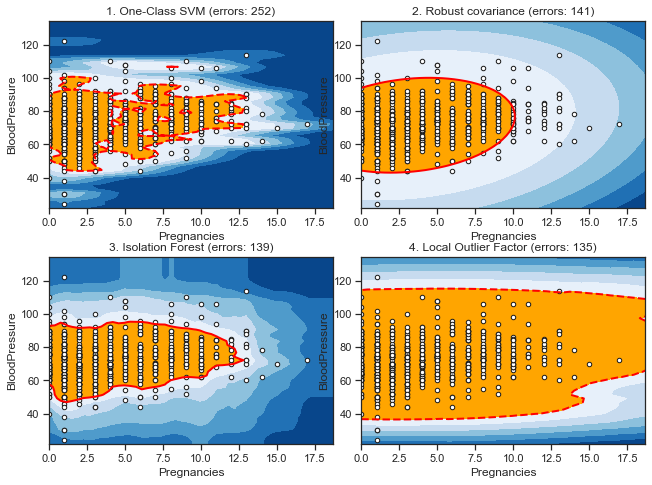

In [47]:
tt = OutLierDetection(df,'Pregnancies','BloodPressure',.1)

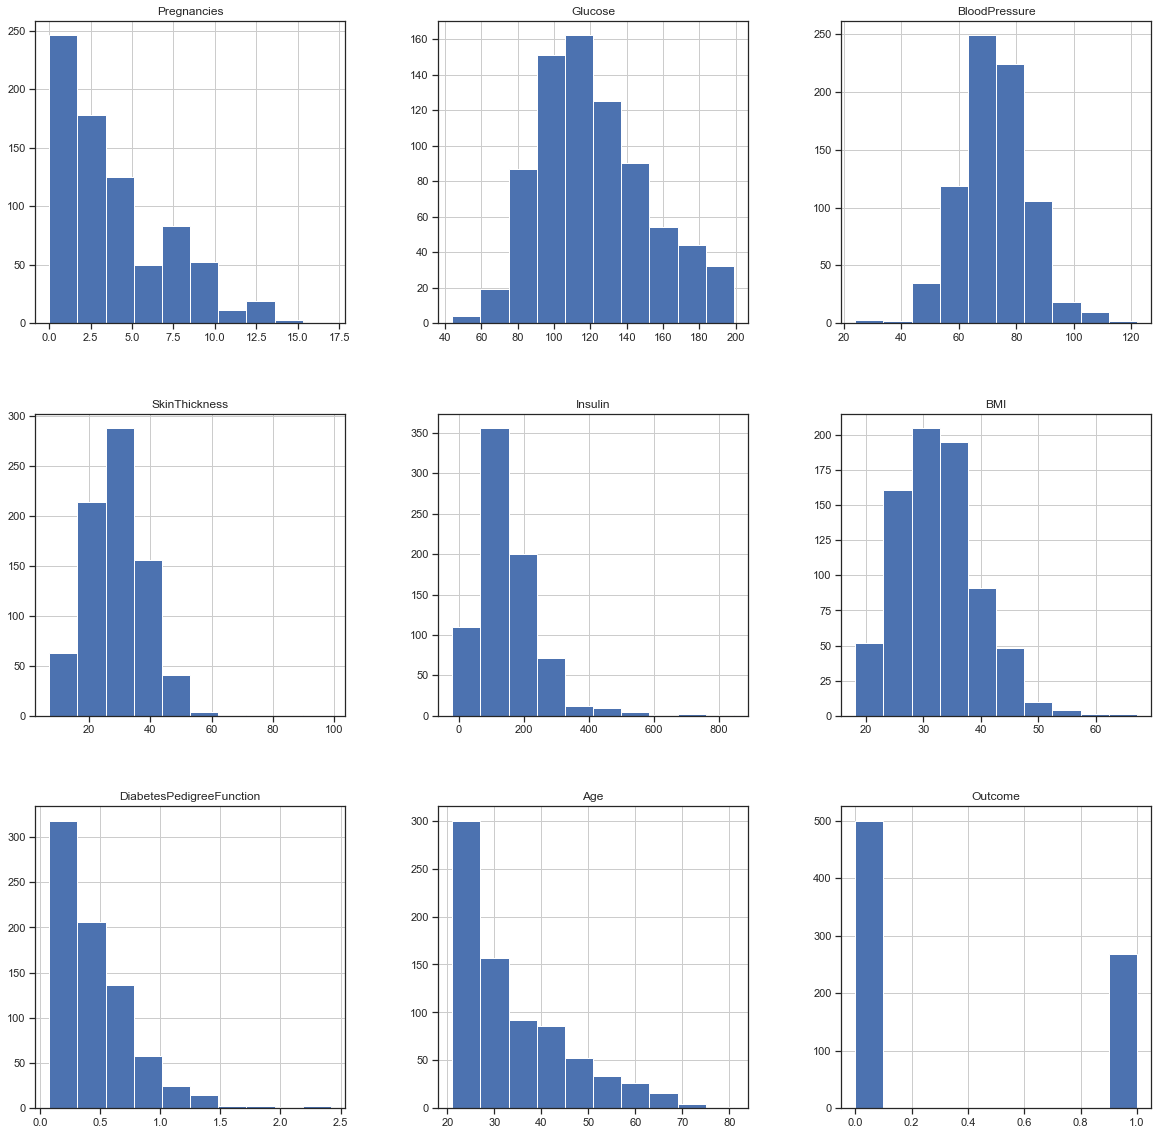

In [48]:
p =df.hist(figsize = (20,20))

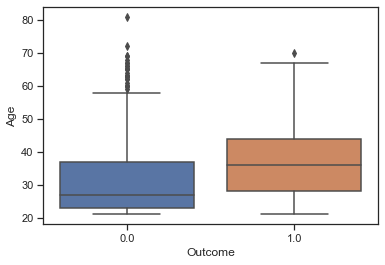

In [49]:
#plot outcome by age
sns.boxplot(x="Outcome",y="Age",data=df)
plt.show()

In [50]:
df.dtypes.value_counts()

float64    9
dtype: int64

In [51]:
from  plotly.offline import plot
import chart_studio.plotly as py
from plotly import __version__ 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import cufflinks as cf
cf.go_offline()
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected='true')


In [52]:
df.describe().T

count        mean        std        min        25%         50%        75%     max
Pregnancies               768.0    3.845052   3.369578   0.000000   1.000000    3.000000    6.00000   17.00
Glucose                   768.0  121.657925  30.486806  44.000000  99.000000  117.000000  141.00000  199.00
BloodPressure             768.0   72.351320  12.147653  24.000000  64.000000   72.000000   80.00000  122.00
SkinThickness             768.0   28.905434   9.522424   7.000000  22.108834   28.484103   35.00000   99.00
Insulin                   768.0  152.683880  97.379029 -19.501719  89.995625  130.127707  190.00000  846.00
BMI                       768.0   32.441484   6.879519  18.200000  27.500000   32.050000   36.60000   67.10
DiabetesPedigreeFunction  768.0    0.471876   0.331329   0.078000   0.243750    0.372500    0.62625    2.42
Age                       768.0   33.240885  11.760232  21.000000  24.000000   29.000000   41.00000   81.00
Outcome                   768.0    0.348958   0.476951   0.000000   0.000000    0.000000    1.00000    1.00

In [53]:

df['Glucose'].iplot(kind='hist',bins = 10)




In [54]:
df['BloodPressure'].iplot(kind='hist',bins = 10)



In [55]:
df['SkinThickness'].iplot(kind='hist',bins = 10)



In [56]:
df['Insulin'].iplot(kind='hist',bins = 10)


In [57]:
df['BMI'].iplot(kind='hist',bins = 10)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Outcome'>

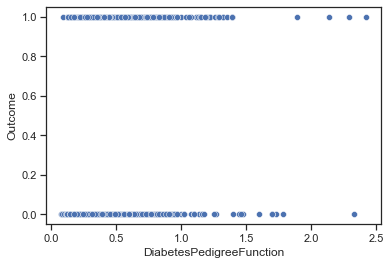

In [59]:
sns.scatterplot(df['DiabetesPedigreeFunction'],df['Outcome'])

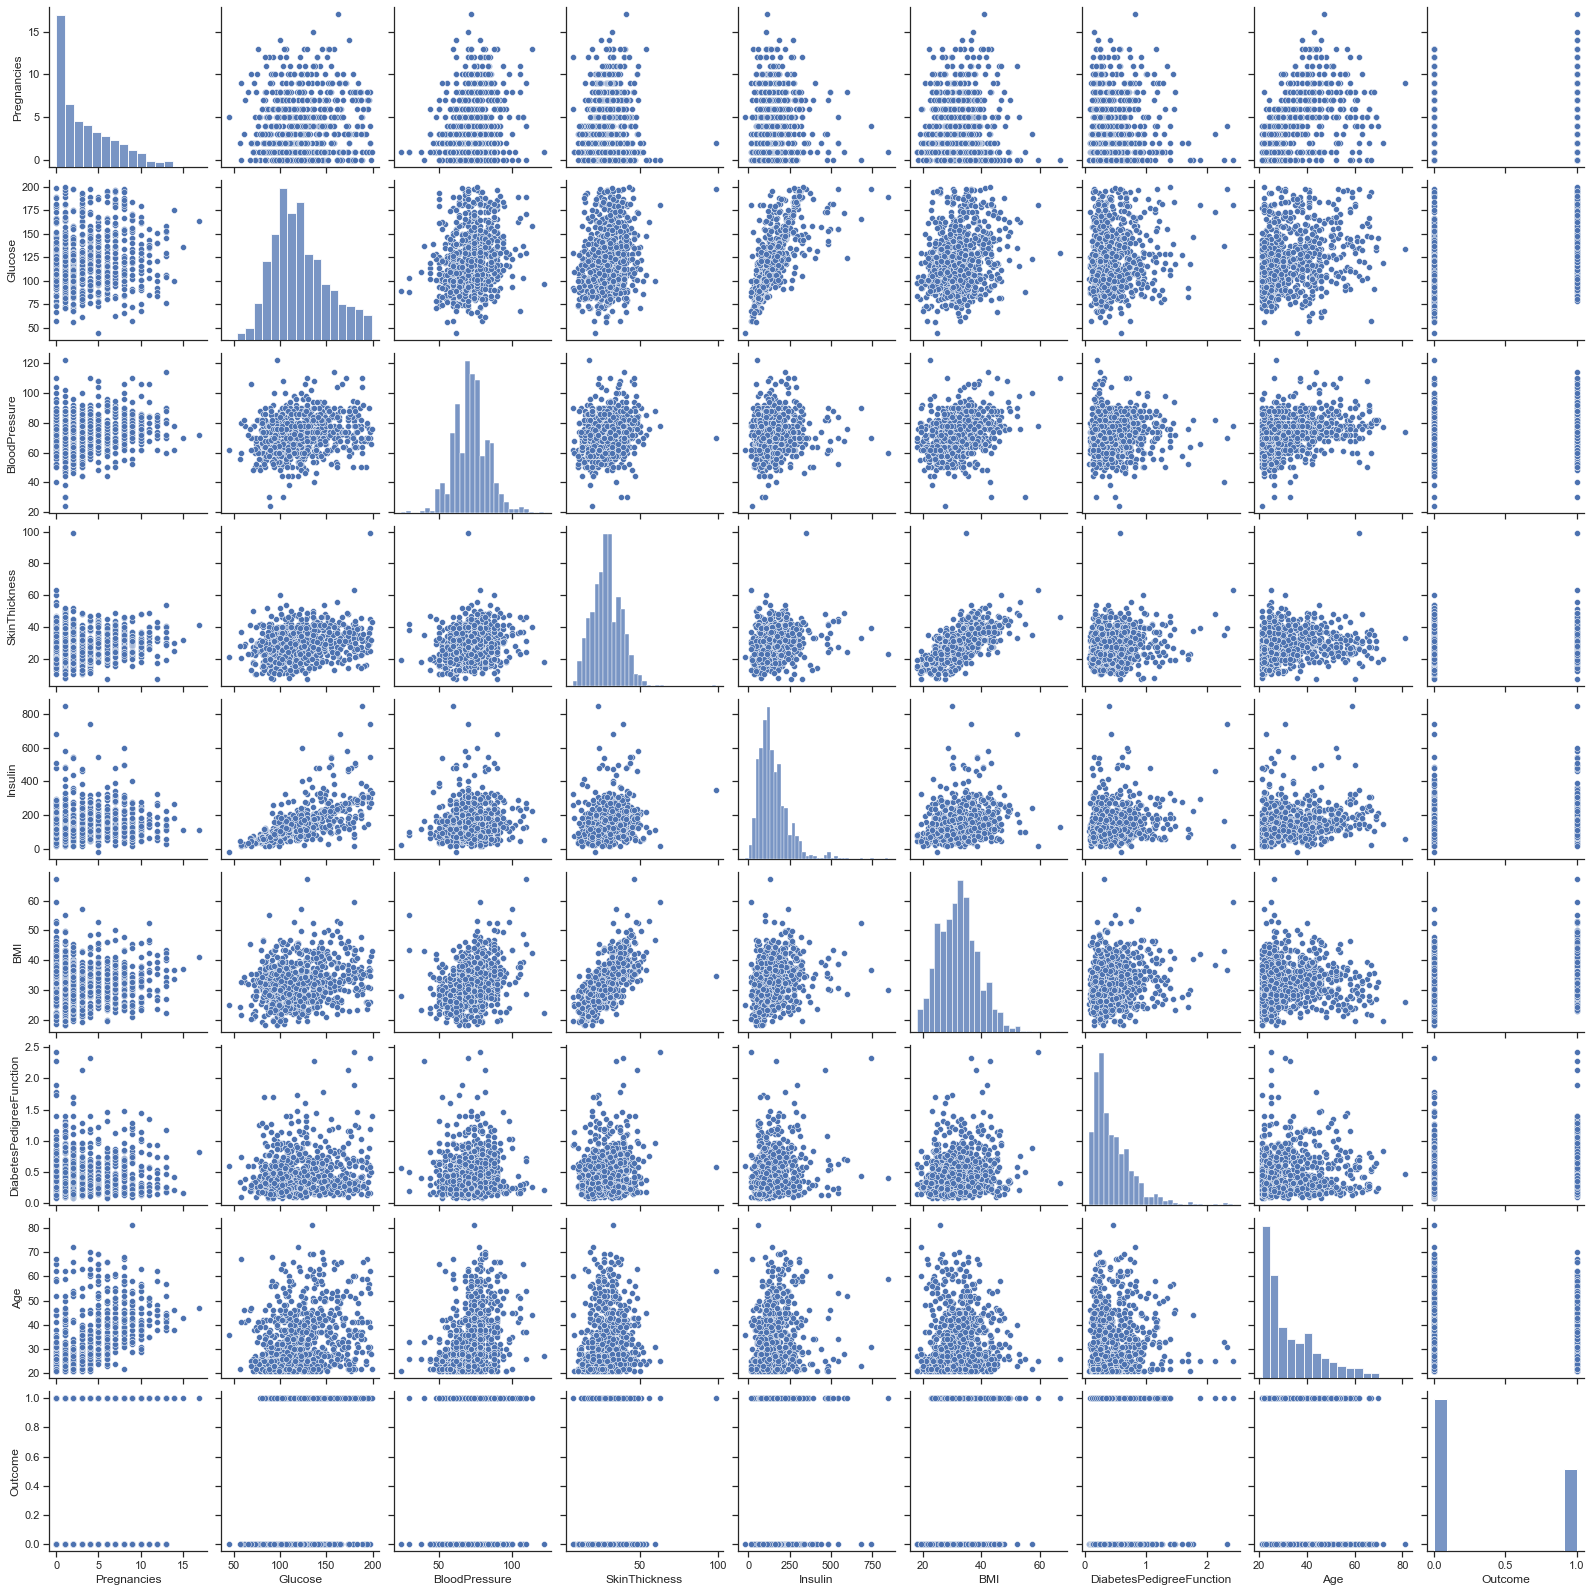

In [60]:
sns.pairplot(df)

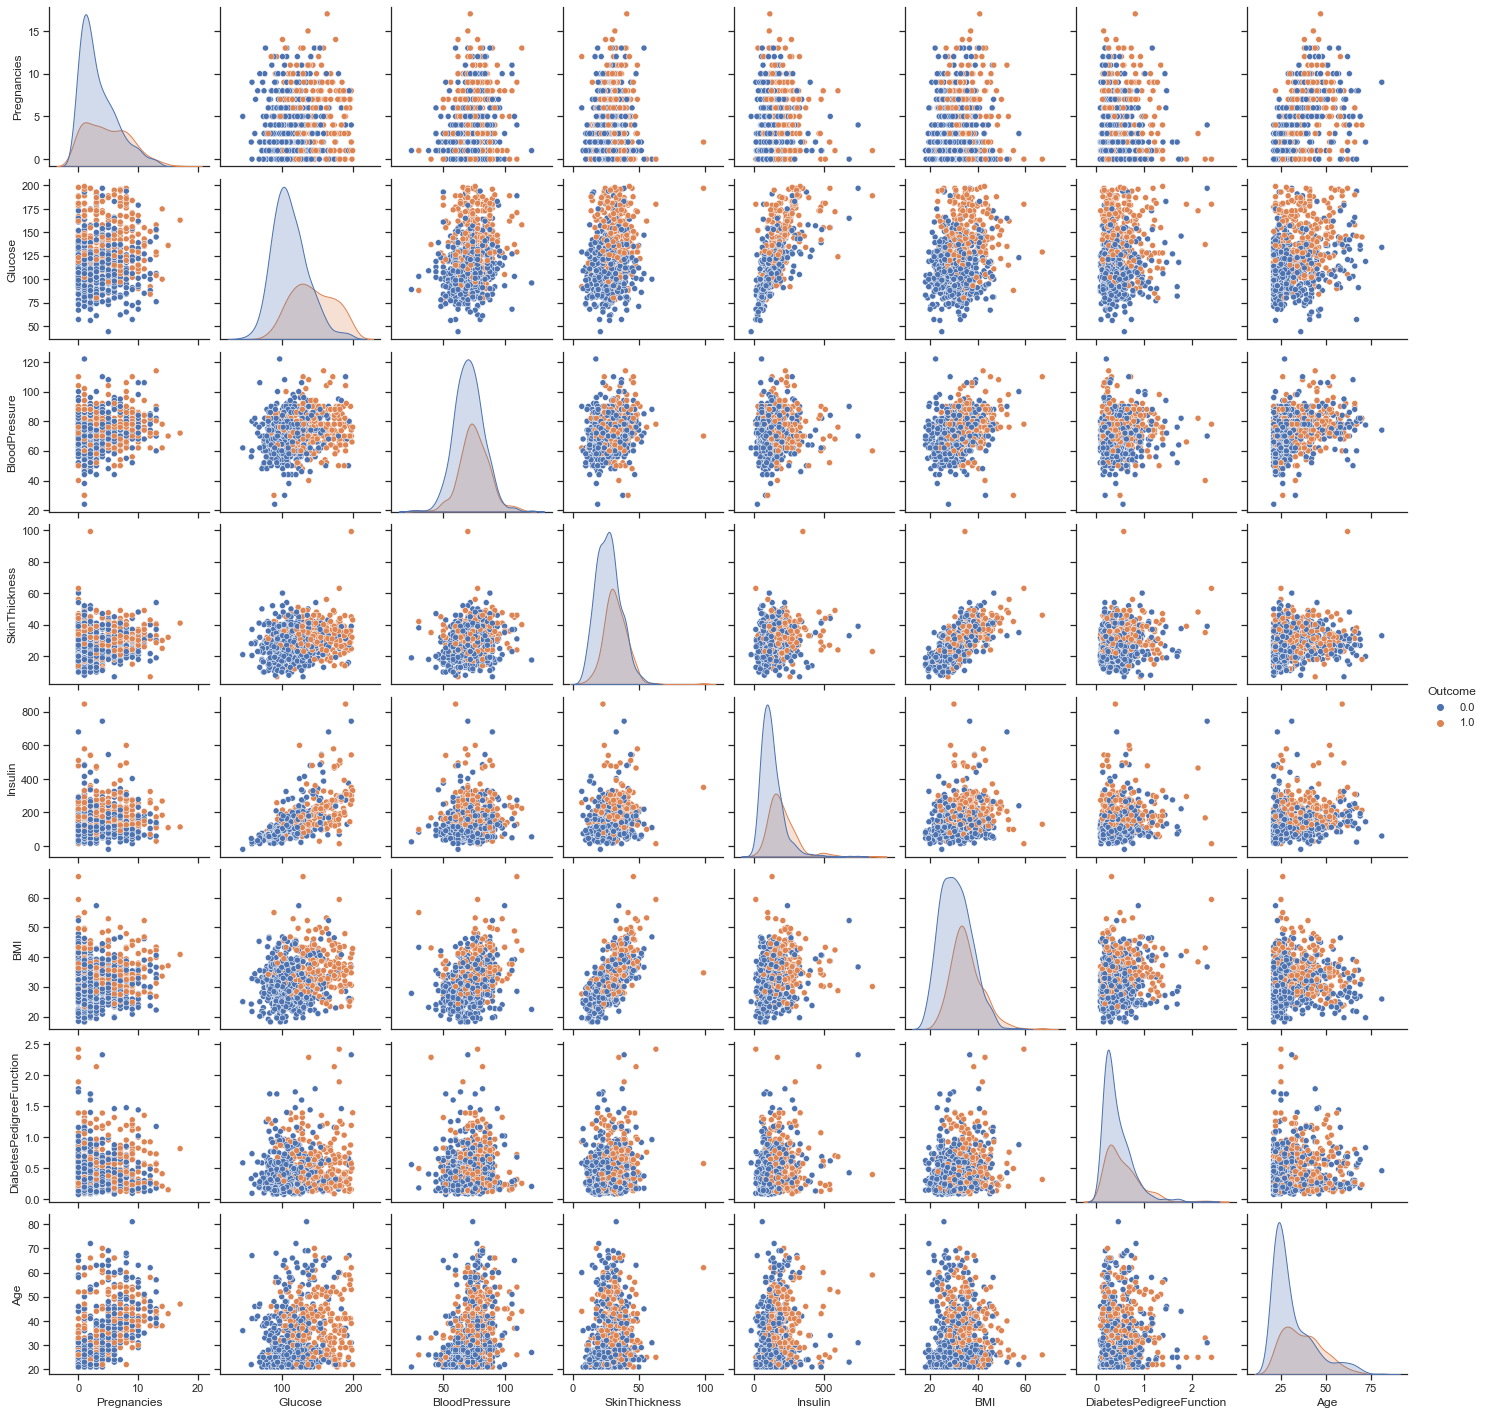

In [61]:
sns.pairplot(df,hue='Outcome')

In [62]:
def scatter(x1,y1):
    plt.figure()
    sns.scatterplot(x =x1,y=y1,hue='Outcome',data = df)
    plt.show()

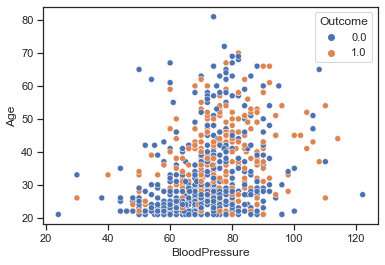

In [63]:
scatter(df['BloodPressure'],df['Age'])

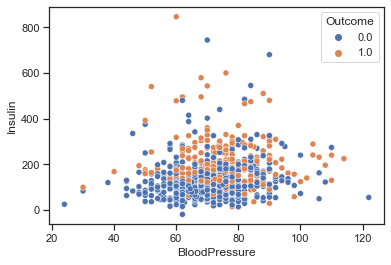

In [64]:
scatter(df['BloodPressure'],df['Insulin'])

In [65]:
def scatter(df, column):
    plt.figure()
    plt.scatter(df[column] , df['Outcome'])
    plt.ylabel('Outcome')
    plt.xlabel(column)

In [66]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], dtype='object')

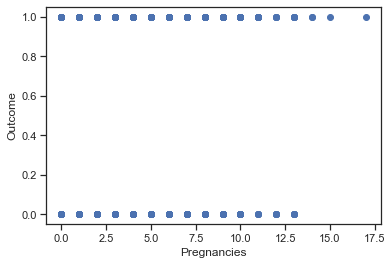

In [67]:
scatter(df, 'Pregnancies')



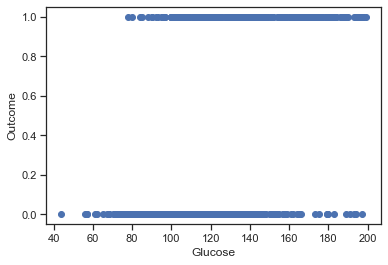

In [68]:
scatter(df, 'Glucose')


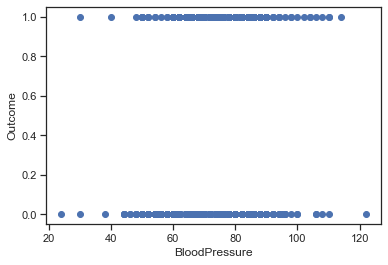

In [69]:
scatter(df, 'BloodPressure')


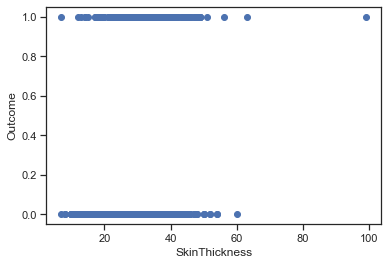

In [70]:
scatter(df, 'SkinThickness')


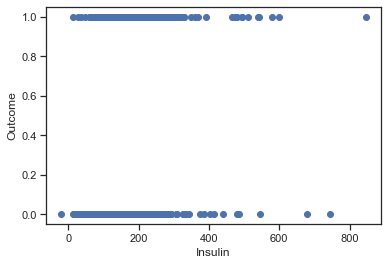

In [71]:
scatter(df, 'Insulin')


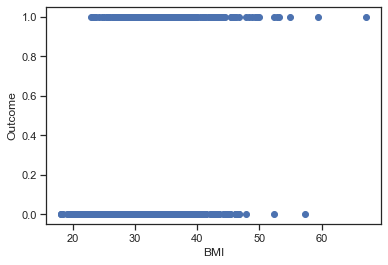

In [72]:
scatter(df, 'BMI')


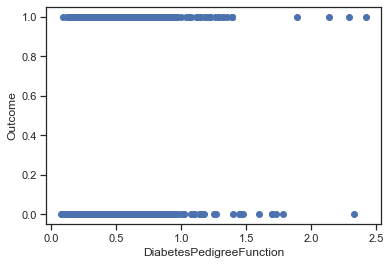

In [73]:
scatter(df, 'DiabetesPedigreeFunction')


<AxesSubplot:xlabel='Outcome', ylabel='count'>

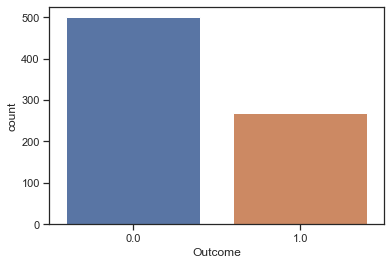

In [74]:
sns.countplot(df['Outcome'])

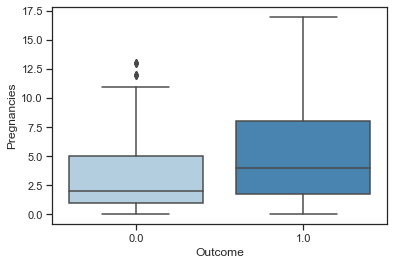

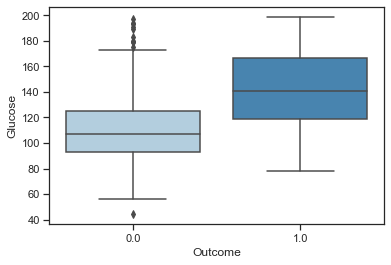

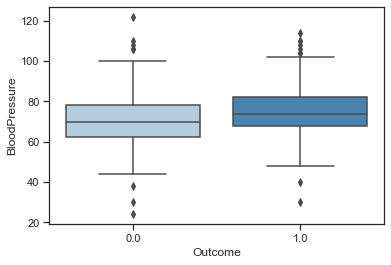

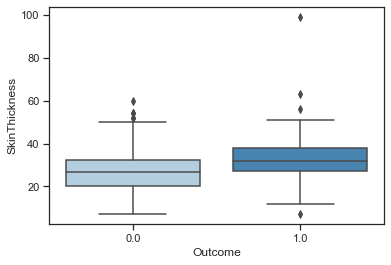

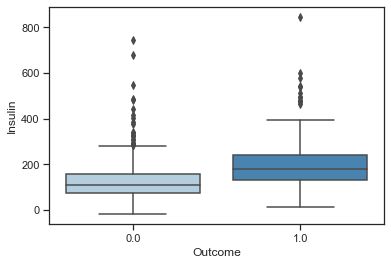

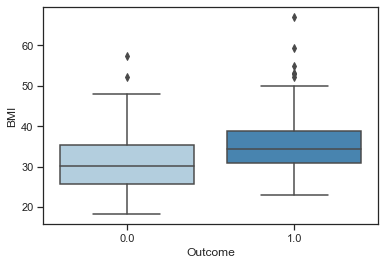

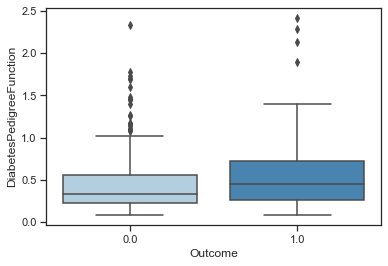

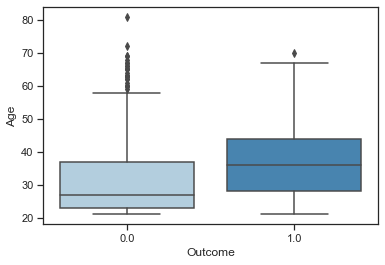

In [75]:
def boxplot(df: pd.DataFrame) -> None:
    """
    Visualize a boxplot for each feature for each class.
    """
    fig, axis = plt.subplots()

    for col in df.columns:
        if col != 'Outcome':
            sns.boxplot(x='Outcome', y=col, data=df, palette='Blues')
            plt.show()
            
# call the function to display the boxplot
boxplot(df=df)

Text(0, 0.5, 'Glucose')

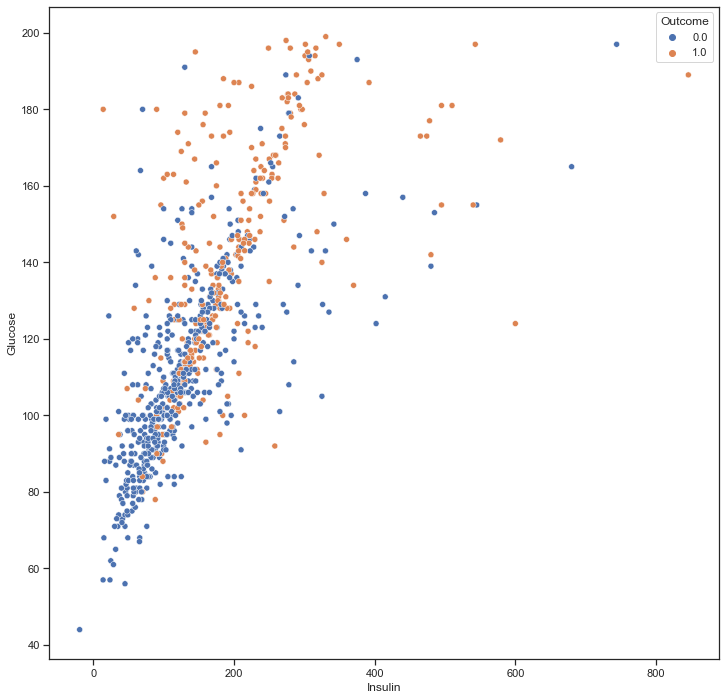

In [76]:
plt.figure(figsize = (12,12))
sns.scatterplot(x='Insulin', y='Glucose', hue='Outcome', data=df)
plt.xlabel('Insulin')
plt.ylabel('Glucose')

In [77]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  DiabetesPedigreeFunction   Age  Outcome
0          6.0    148.0           72.0      35.000000  218.903553  33.6                     0.627  50.0      1.0
1          1.0     85.0           66.0      29.000000   70.314661  26.6                     0.351  31.0      0.0
2          8.0    183.0           64.0      21.542781  268.507178  23.3                     0.672  32.0      1.0
3          1.0     89.0           66.0      23.000000   94.000000  28.1                     0.167  21.0      0.0
4          0.0    137.0           40.0      35.000000  168.000000  43.1                     2.288  33.0      1.0

Text(0, 0.5, 'BloodPressure')

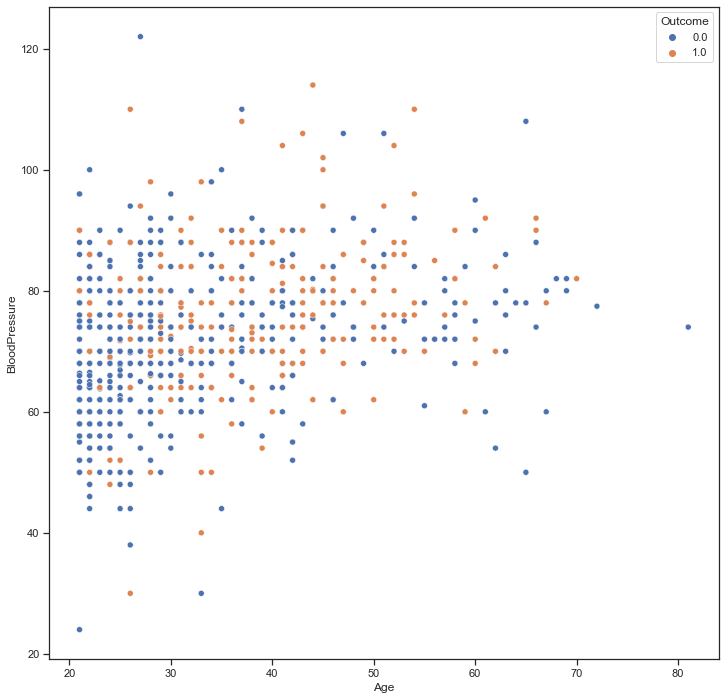

In [78]:
plt.figure(figsize = (12,12))
sns.scatterplot(x = "Age",y = "BloodPressure",hue = 'Outcome',data = df)
plt.xlabel('Age')
plt.ylabel('BloodPressure')



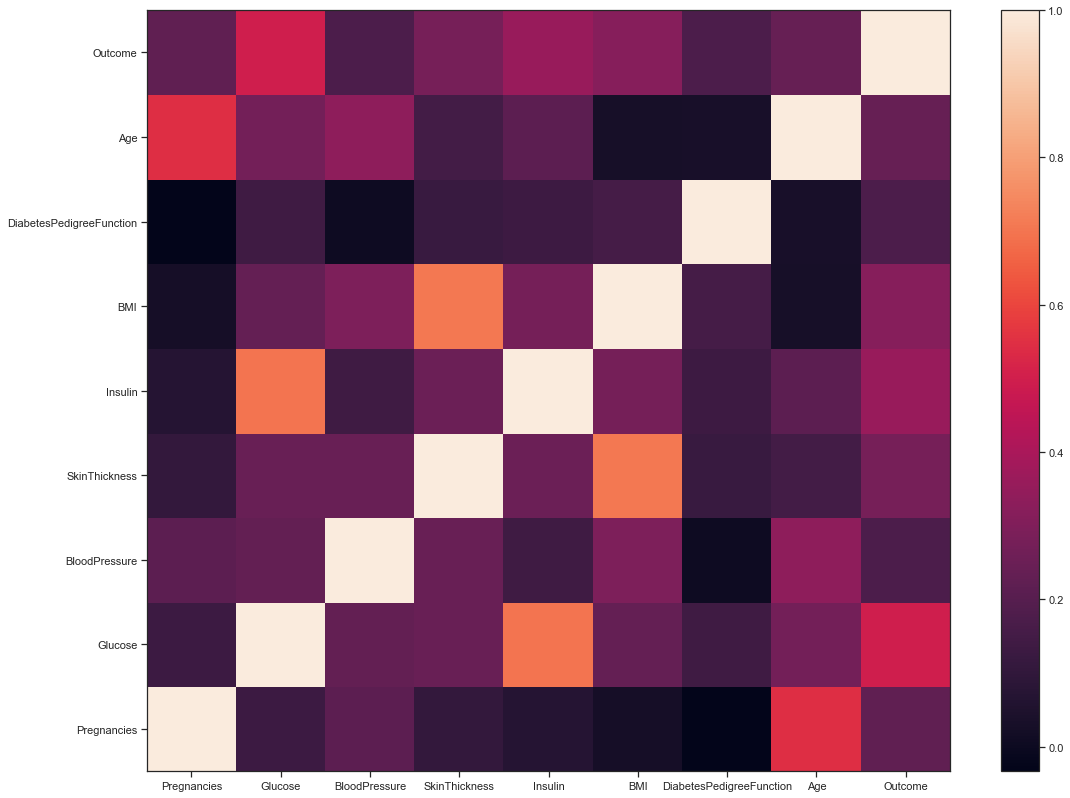

In [79]:
fig = plt.figure(figsize=(18, 14))
corr = df.corr()
c = plt.pcolor(corr)
plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index)
plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns)
fig.colorbar(c)

<Figure size 864x864 with 0 Axes>

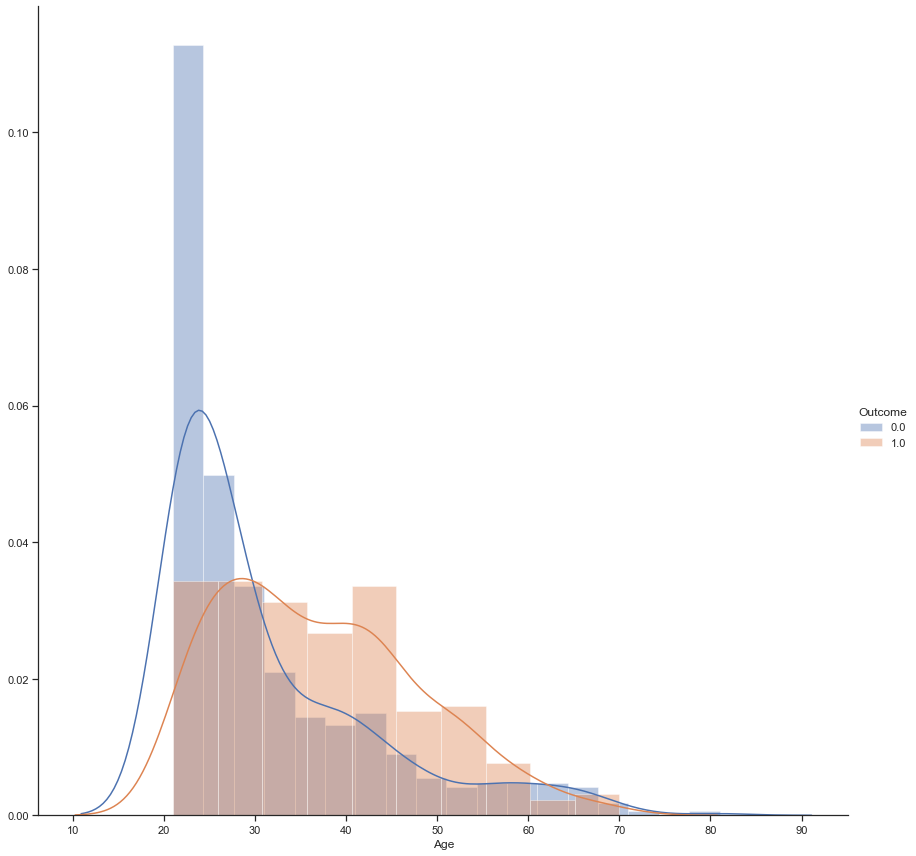

In [80]:
#plotting age feature
plt.figure(figsize = (12,12))
sns.FacetGrid(df, hue="Outcome", size=12) \
   .map(sns.distplot, "Age") \
   .add_legend()
plt.show()

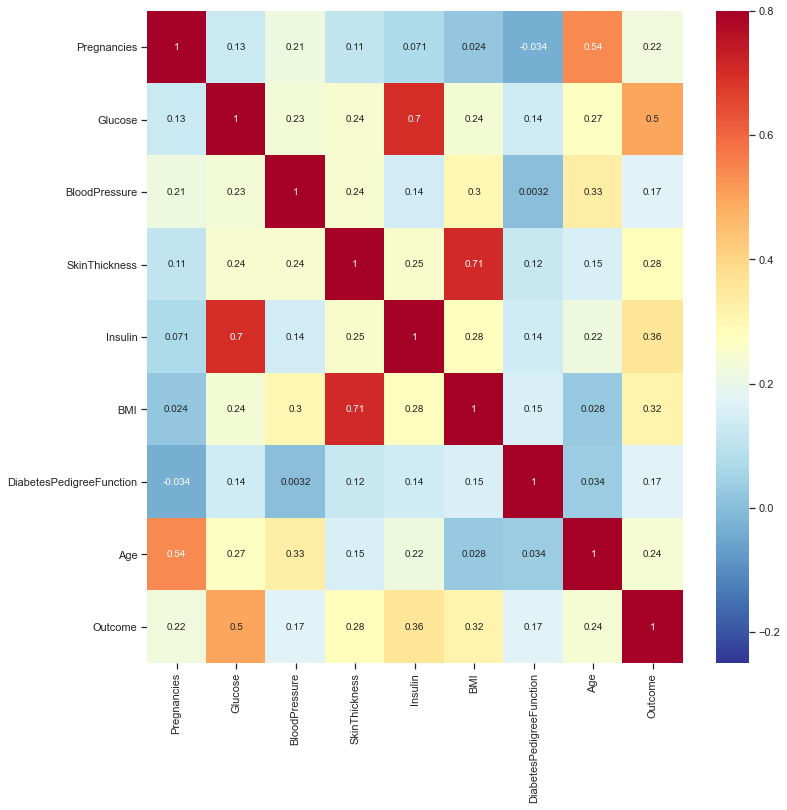

In [81]:
plt.figure(figsize = (12,12))
sns.heatmap(corr,annot=True,cmap = plt.cm.RdYlBu_r, vmin = -0.25, vmax = 0.8)
plt.show()

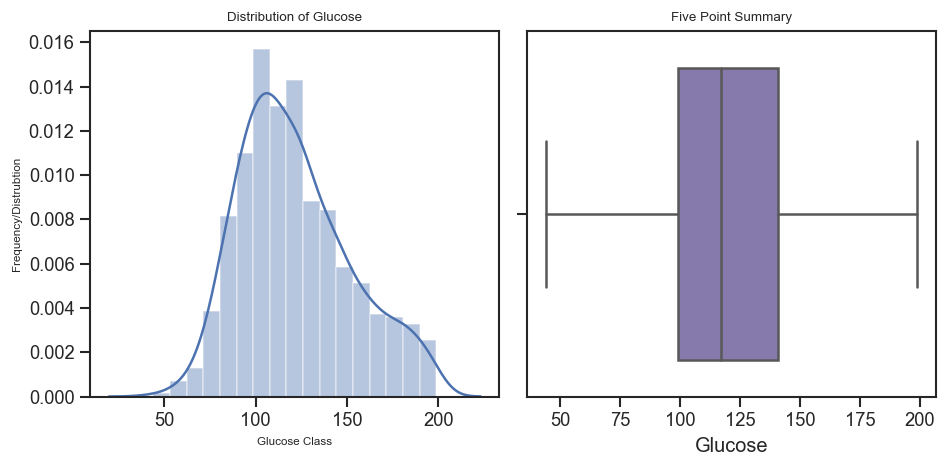

In [82]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Glucose'],ax=axes[0],color='b')
axes[0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Glucose',data=df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Statistical Assumption
Let us check for some assumption like variance. Distribution is absolutely fine. We have already seen in other notebooks

In [83]:
df.var()

Pregnancies                   11.354056
Glucose                      929.445326
BloodPressure                147.565484
SkinThickness                 90.676561
Insulin                     9482.675209
BMI                           47.327775
DiabetesPedigreeFunction       0.109779
Age                          138.303046
Outcome                        0.227483
dtype: float64

In [84]:
def plot_dist_col(column):
    '''plot dist curves for train and test weather data for the given column name'''
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.distplot(df[column].dropna(), color='green', ax=ax).set_title(column, fontsize=16)
   
    plt.xlabel(column, fontsize=15)
    plt.legend(['df'])
    plt.show()

In [85]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], dtype='object')

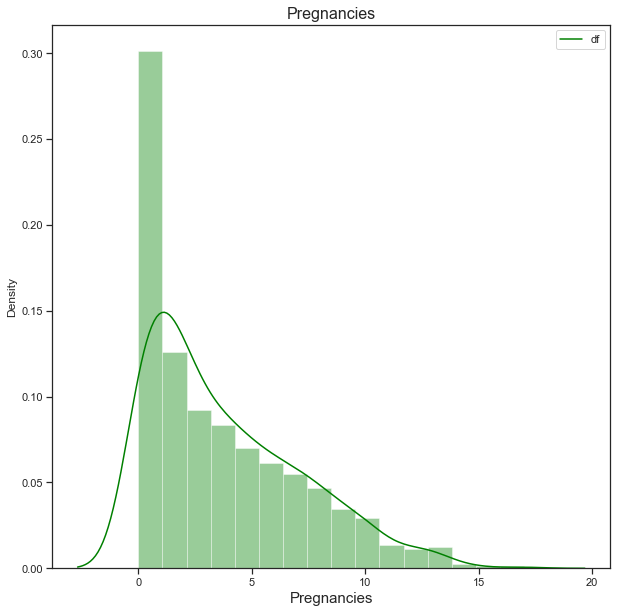

In [86]:
plot_dist_col('Pregnancies')

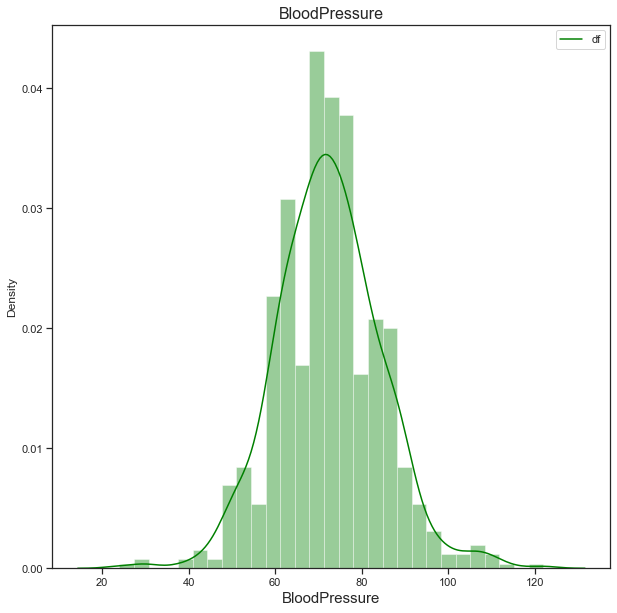

In [87]:
plot_dist_col('BloodPressure')

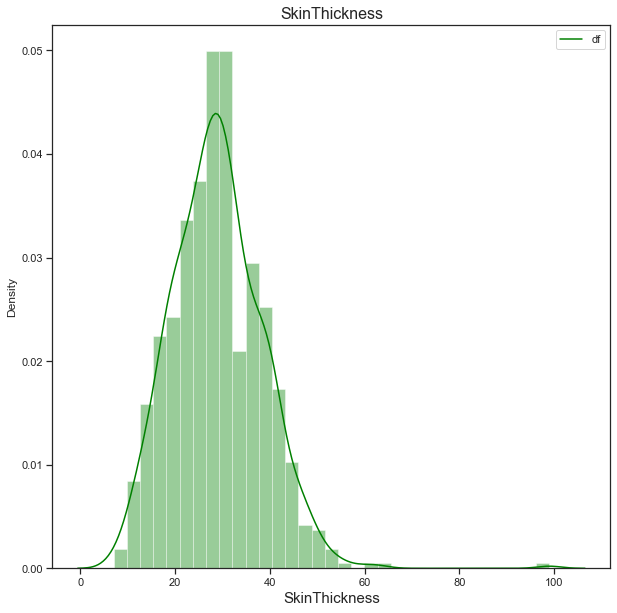

In [88]:
plot_dist_col('SkinThickness')

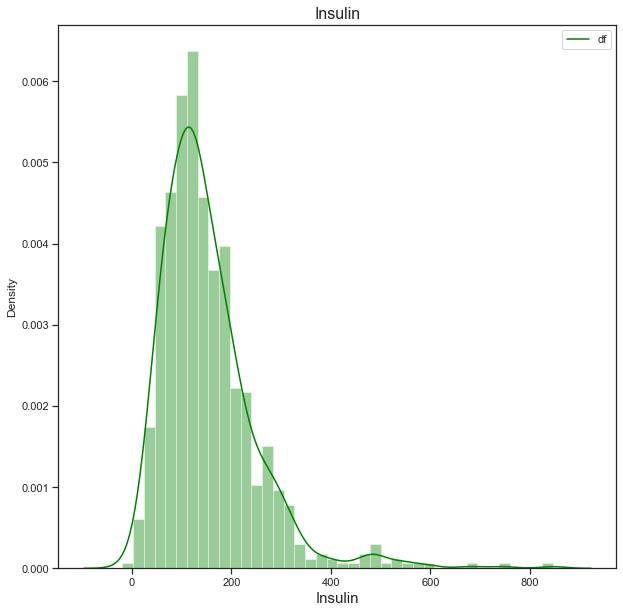

In [89]:
plot_dist_col('Insulin')

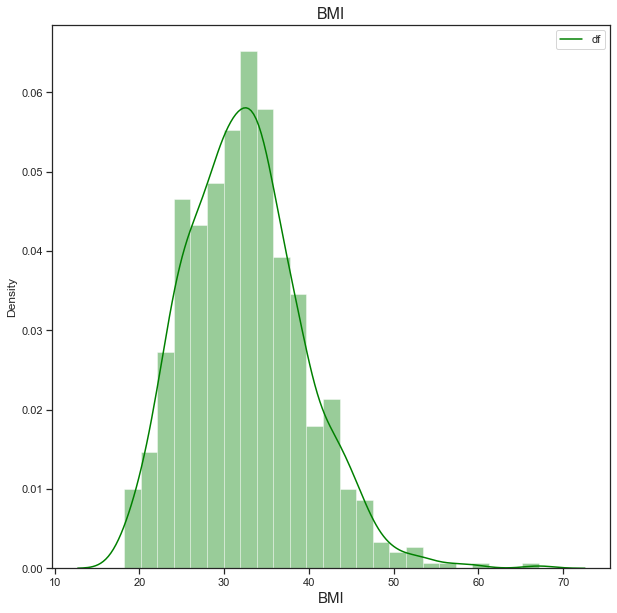

In [90]:
plot_dist_col('BMI')

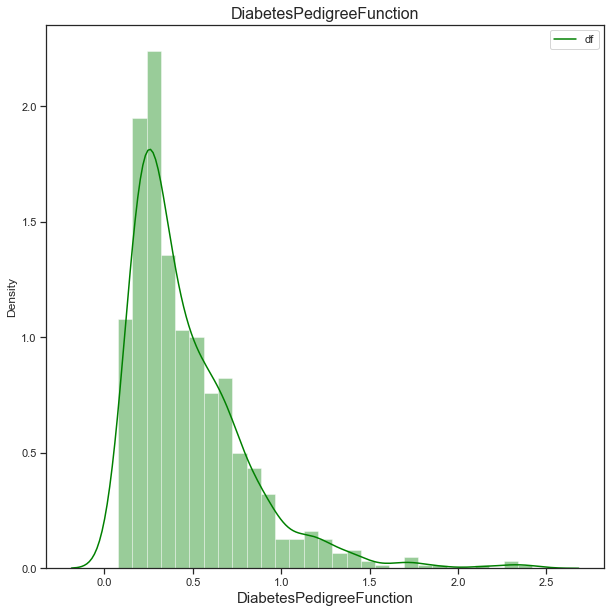

In [91]:
plot_dist_col('DiabetesPedigreeFunction')

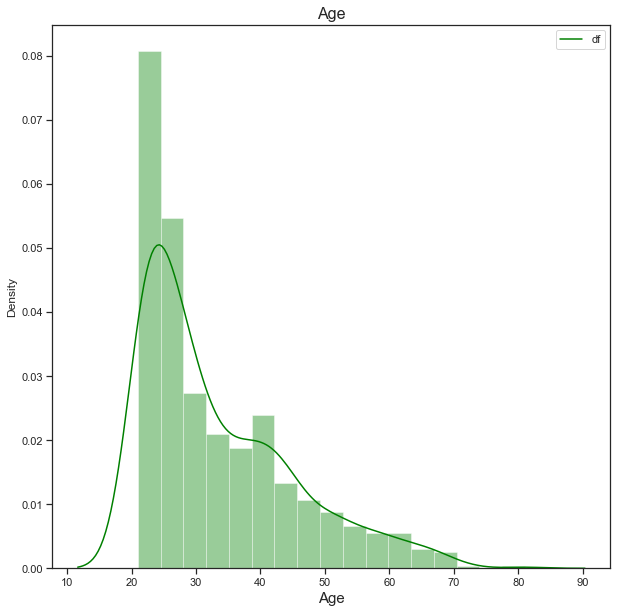

In [92]:
plot_dist_col('Age')

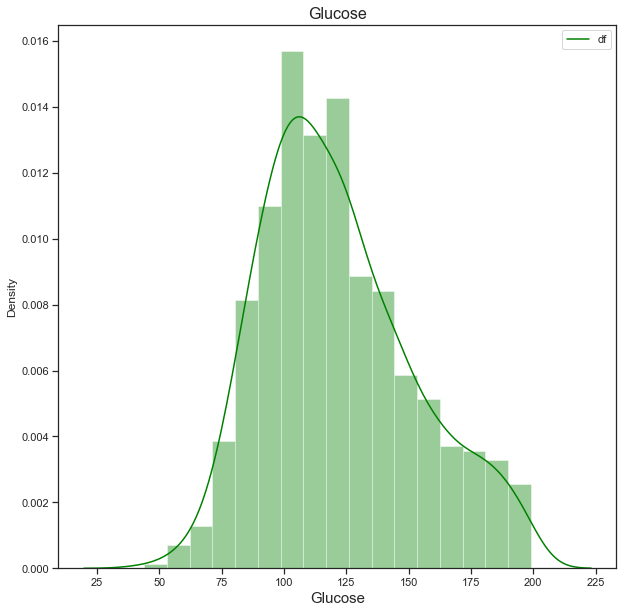

In [93]:
plot_dist_col('Glucose')

In [94]:
print("Skewness: ", df['Outcome'].skew()) #skewness
print("Kurtosis: ", df['Outcome'].kurt()) #kurtosis

Skewness:  0.635016643444986
Kurtosis:  -1.600929755156027


In [95]:
# Threshold for removing correlated variables
threshold = 0.92

# Absolute value correlation matrix
corr_matrix = df.corr().abs()
corr_matrix.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  DiabetesPedigreeFunction       Age   Outcome
Pregnancies       1.000000  0.130868       0.213643       0.107254  0.070628  0.024170                  0.033523  0.544341  0.221898
Glucose           0.130868  1.000000       0.230901       0.244077  0.699755  0.236731                  0.138932  0.269671  0.496507
BloodPressure     0.213643  0.230901       1.000000       0.242911  0.139758  0.296615                  0.003154  0.334848  0.174864
SkinThickness     0.107254  0.244077       0.242911       1.000000  0.251596  0.706192                  0.122078  0.152018  0.279509
Insulin           0.070628  0.699755       0.139758       0.251596  1.000000  0.275203                  0.135871  0.215502  0.361085

In [96]:
import xgboost as xgb

train_y = df['Outcome']
train_X = df.drop(['Outcome'], axis=1)

xgb_params = {
    'eta': 0.05,
    'max_depth': 10,
    'subsample': 1.0,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

[12:05:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[12:05:28] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:05:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


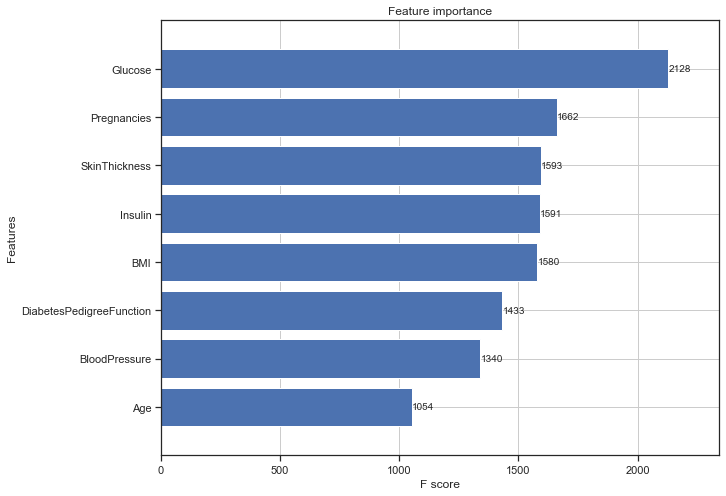

In [97]:
import warnings
warnings.filterwarnings('ignore')
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)
remain_num = 99

fig, ax = plt.subplots(figsize=(10,8))
xgb.plot_importance(model, max_num_features=remain_num, height=0.8, ax=ax)
plt.show()

In [98]:
y = df['Outcome']
x= df.drop(['Outcome'], axis=1)

In [99]:
from scipy.stats import zscore
from time import time

In [100]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

log = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg')
bag_clf = BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=0)
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5, criterion ='entropy', max_features = 2) 
dec_clf = DecisionTreeClassifier(random_state=0)
gnb = GaussianNB()
ran_clf = RandomForestClassifier(max_depth=2, random_state=0)
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=0)
gra_clf = GradientBoostingClassifier(learning_rate=0.05,max_depth=3,max_features=0.5,random_state=0)
xgb_clf = XGBClassifier()

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.30, random_state = 0)

In [102]:
start_time=time()
model_list=[log,bag_clf,extra_tree_forest,dec_clf,ran_clf,gnb,ada_clf,xgb_clf,gra_clf ]
Score=[]
for i in model_list:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    score=accuracy_score(y_test,y_pred)
    Score.append(score)
print(pd.DataFrame(zip(model_list,Score),columns=['Model Used','accuracy_score']))
end_time=time()
print(round(end_time-start_time,2),'sec')

                                          Model Used  accuracy_score
0  LogisticRegression(multi_class='multinomial', ...        0.761905
1  (SVC(random_state=2087557356), SVC(random_stat...        0.740260
2  (ExtraTreeClassifier(criterion='entropy', max_...        0.761905
3             DecisionTreeClassifier(random_state=0)        0.688312
4  (DecisionTreeClassifier(max_depth=2, max_featu...        0.757576
5                                       GaussianNB()        0.748918
6  (DecisionTreeClassifier(max_depth=1, random_st...        0.761905
7  XGBClassifier(base_score=0.5, booster='gbtree'...        0.774892
8  ([DecisionTreeRegressor(criterion='friedman_ms...        0.774892
1.35 sec


In [103]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

x_train_std = ss.fit_transform(x_train)
x_test_std= ss.transform(x_test)

In [104]:
start_time=time()
model_list=[log,bag_clf,extra_tree_forest,dec_clf,ran_clf,gnb,ada_clf,xgb_clf,gra_clf ]
Score=[]
for i in model_list:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    score=accuracy_score(y_test,y_pred)
    Score.append(score)
print(pd.DataFrame(zip(model_list,Score),columns=['Model Used','accuracy_score']))
end_time=time()
print(round(end_time-start_time,2),'sec')



start_time=time()
model_list=[log,bag_clf,extra_tree_forest,dec_clf,ran_clf,gnb,ada_clf,xgb_clf,gra_clf ]
Score=[]
for i in model_list:
    i.fit(x_train_std,y_train)
    y_pred=i.predict(x_test_std)
    score=accuracy_score(y_test,y_pred)
    Score.append(score)
print(pd.DataFrame(zip(model_list,Score),columns=['Model Used','accuracy_score']))
end_time=time()
print(round(end_time-start_time,2),'sec')

                                          Model Used  accuracy_score
0  LogisticRegression(multi_class='multinomial', ...        0.761905
1  (SVC(random_state=2087557356), SVC(random_stat...        0.740260
2  (ExtraTreeClassifier(criterion='entropy', max_...        0.744589
3             DecisionTreeClassifier(random_state=0)        0.688312
4  (DecisionTreeClassifier(max_depth=2, max_featu...        0.757576
5                                       GaussianNB()        0.748918
6  (DecisionTreeClassifier(max_depth=1, random_st...        0.761905
7  XGBClassifier(base_score=0.5, booster='gbtree'...        0.774892
8  ([DecisionTreeRegressor(criterion='friedman_ms...        0.774892
0.97 sec
                                          Model Used  accuracy_score
0  LogisticRegression(multi_class='multinomial', ...        0.761905
1  (SVC(random_state=2087557356), SVC(random_stat...        0.740260
2  (ExtraTreeClassifier(criterion='entropy', max_...        0.774892
3             DecisionTre

In [191]:
ran_clf = RandomForestClassifier(max_depth=2, random_state=0)

In [192]:
rfmodel = ran_clf.fit(x_train,y_train)
y_pred2 = rfmodel.predict(x_test)
accuracy_score(y_test,y_pred2)

0.7575757575757576

[[145  12]
 [ 44  30]]
0.7575757575757576
              precision    recall  f1-score   support

         0.0       0.77      0.92      0.84       157
         1.0       0.71      0.41      0.52        74

    accuracy                           0.76       231
   macro avg       0.74      0.66      0.68       231
weighted avg       0.75      0.76      0.74       231



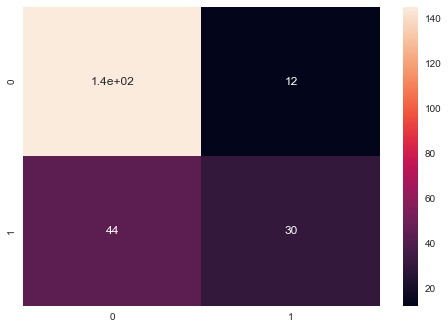

In [193]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cn = confusion_matrix(y_test,y_pred2)
sns.heatmap(cn,annot=True)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

In [105]:
xgb_clf = XGBClassifier()

In [106]:
xgmodel = xgb_clf.fit(x_train,y_train)

In [107]:
y_pred1 = xgmodel.predict(x_test)

In [108]:
accuracy_score(y_test,y_pred1)

0.7748917748917749

[[138  19]
 [ 33  41]]
0.7748917748917749
              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       157
         1.0       0.68      0.55      0.61        74

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.77      0.77      0.77       231



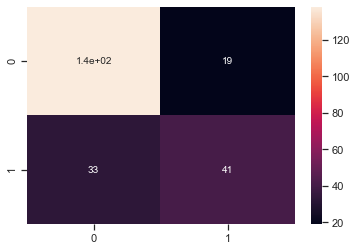

In [109]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cn = confusion_matrix(y_test,y_pred)
sns.heatmap(cn,annot=True)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[140  17]
 [ 40  34]]
0.7532467532467533
              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83       157
         1.0       0.67      0.46      0.54        74

    accuracy                           0.75       231
   macro avg       0.72      0.68      0.69       231
weighted avg       0.74      0.75      0.74       231



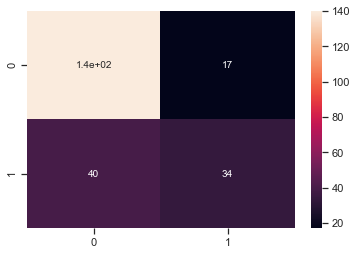

In [110]:
###  Hyperparameter Tuning
model=RandomForestClassifier(n_estimators = 200,
 min_samples_split = 14,
  min_samples_leaf = 6,
 max_features =  'sqrt',
  max_depth= 10,
  criterion = 'gini').fit(x_train,y_train)
predictions=model.predict(x_test)
cn = confusion_matrix(y_test,predictions)
sns.heatmap(cn,annot=True)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[140  17]
 [ 37  37]]
0.7662337662337663
              precision    recall  f1-score   support

         0.0       0.79      0.89      0.84       157
         1.0       0.69      0.50      0.58        74

    accuracy                           0.77       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.76      0.77      0.75       231



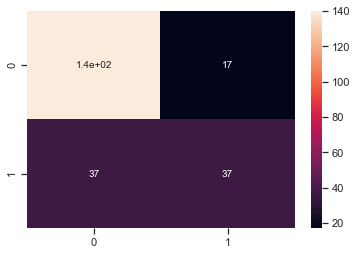

In [111]:
### Manual Hyperparameter Tuning
model=RandomForestClassifier(n_estimators=300,criterion='entropy',max_features='sqrt',min_samples_leaf=10,random_state=100).fit(x_train,y_train)
predictions=model.predict(x_test)
cn = confusion_matrix(y_test,predictions)
sns.heatmap(cn,annot=True)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

In [112]:
#like gridserach CV , hyper tuning randomserach CV
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'criterion':['gini','entropy']}

In [113]:
print(random_grid)

{'n_estimators': [300, 488, 677, 866, 1055, 1244, 1433, 1622, 1811, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['gini', 'entropy']}


In [114]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 10.1min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [300, 488, 677, 866,
                                                         1055, 1244, 1433, 1622,
                                                         1811, 2000]},
                   random_state=100, verbose=2)

In [115]:
rf_randomcv.best_params_

{'n_estimators': 2000,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 340,
 'criterion': 'entropy'}

In [116]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [300, 488, 677, 866,
                                                         1055, 1244, 1433, 1622,
                                                         1811, 2000]},
                   random_state=100, verbose=2)

In [117]:
best_random_grid=rf_randomcv.best_estimator_

In [118]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score:{}" .format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[139  18]
 [ 36  38]]
Accuracy Score:0.7662337662337663
Classification report:               precision    recall  f1-score   support

         0.0       0.79      0.89      0.84       157
         1.0       0.68      0.51      0.58        74

    accuracy                           0.77       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.76      0.77      0.76       231



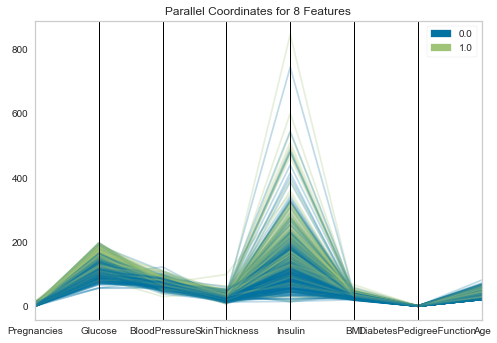

<AxesSubplot:title={'center':'Parallel Coordinates for 8 Features'}>

In [119]:
from yellowbrick.features import ParallelCoordinates

visualizer = ParallelCoordinates()
visualizer.fit_transform(x_train, y_train)
visualizer.show()

In [120]:
visualizer.show(outpath="pcoords.png")

<AxesSubplot:title={'center':'Parallel Coordinates for 8 Features'}>

<Figure size 576x396 with 0 Axes>

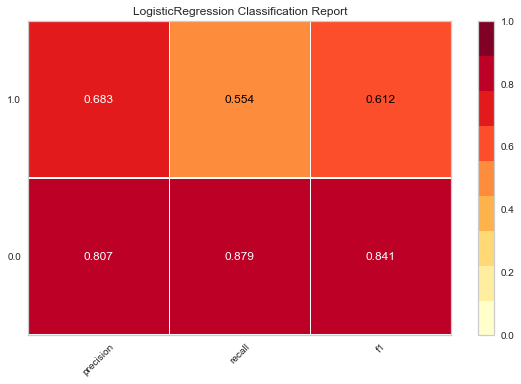

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [121]:
from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
visualizer = ClassificationReport(model)

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

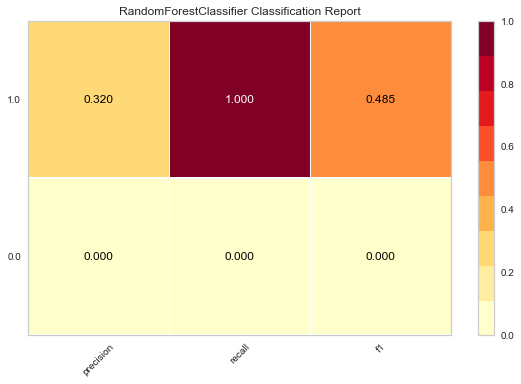

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [122]:
from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
visualizer = ClassificationReport(ran_clf)

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

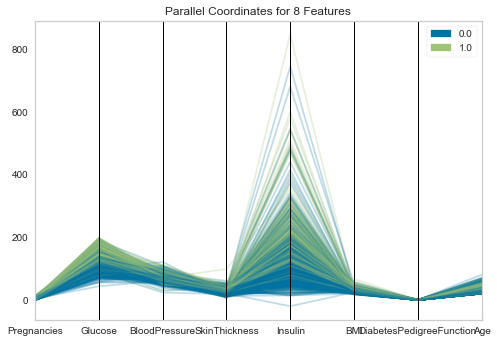

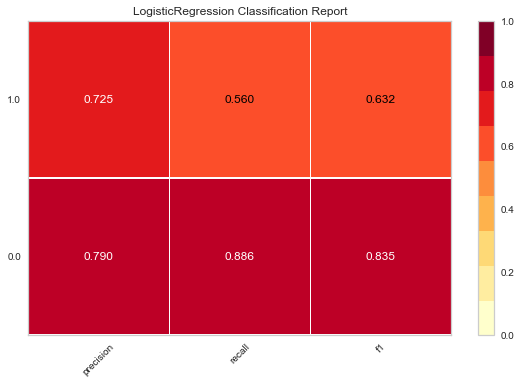

In [123]:
from sklearn.linear_model import LogisticRegression

from yellowbrick.features import parallel_coordinates
from yellowbrick.classifier import classification_report

# Displays parallel coordinates
g = parallel_coordinates(x, y)

# Displays classification report
g = classification_report(LogisticRegression(), x, y)

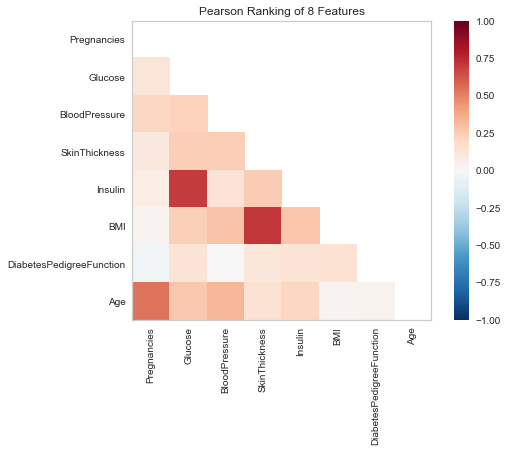

<AxesSubplot:title={'center':'Pearson Ranking of 8 Features'}>

In [124]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(x)
visualizer.show()

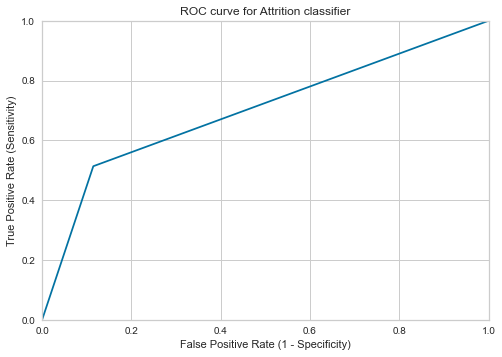

In [125]:
from sklearn import metrics
#IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Attrition classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [126]:
data = pd.read_csv('health care diabetes.csv')

In [127]:
features = data.iloc[:,[0,1,2,3,4,5,6,7]].values
label = data.iloc[:,8].values

In [128]:
features

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [129]:
model1 = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(x_train, y_train)
preds = model1.predict(x_test)

#print the tunable parameters (They were not tuned in this example, everything kept as default)
params = model1.get_params()
print(params)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


AUC: 0.836


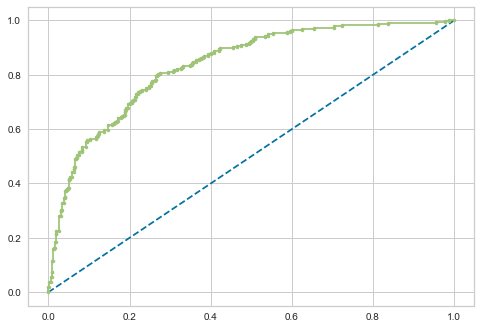

In [130]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = model1.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(label, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(label, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

f1=0.648 auc=0.724 ap=0.725


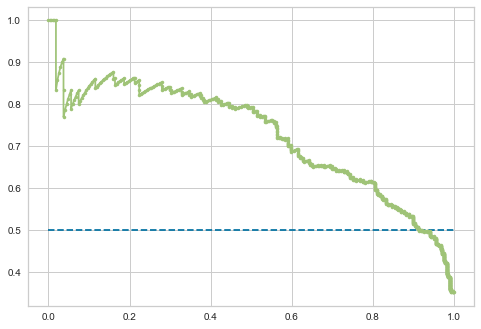

In [131]:
#Precision Recall Curve for Logistic Regression

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = model1.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = model1.predict(features)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probs)
# calculate F1 score
f1 = f1_score(label, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

In [132]:
from lazypredict.Supervised import LazyClassifier
lazy_clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = lazy_clf.fit(x_train, x_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 11.14it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  Time Taken
Model                                                                                    
XGBClassifier                      0.77               0.74     0.74      0.77        0.26
LGBMClassifier                     0.76               0.71     0.71      0.76        0.24
ExtraTreesClassifier               0.77               0.71     0.71      0.76        0.17
BernoulliNB                        0.75               0.70     0.70      0.75        0.04
NearestCentroid                    0.73               0.70     0.70      0.73        0.01
KNeighborsClassifier               0.76               0.70     0.70      0.75        0.11
AdaBoostClassifier                 0.75               0.70     0.70      0.75        0.16
BaggingClassifier                  0.76               0.70     0.70      0.75        0.09
GaussianNB                         0.75               0.69     0.69      0.74        0.02
RandomForestClassifier             0.75               0.69     0.69      0.74        0.26
LinearSVC                          0.76               0.69     0.69      0.75        0.03
CalibratedClassifierCV             0.76               0.69     0.69      0.75        0.14
RidgeClassifierCV                  0.76               0.69     0.69      0.75        0.02
RidgeClassifier                    0.76               0.69     0.69      0.75        0.34
LinearDiscriminantAnalysis         0.76               0.69     0.69      0.75        0.04
LogisticRegression                 0.76               0.69     0.69      0.75        0.02
Perceptron                         0.72               0.69     0.69      0.72        0.01
QuadraticDiscriminantAnalysis      0.74               0.68     0.68      0.73        0.15
ExtraTreeClassifier                0.71               0.67     0.67      0.71        0.02
NuSVC                              0.74               0.66     0.66      0.72        0.02
LabelSpreading                     0.70               0.66     0.66      0.70        0.03
LabelPropagation                   0.70               0.66     0.66      0.70        0.05
SGDClassifier                      0.70               0.65     0.65      0.70        0.02
SVC                                0.73               0.65     0.65      0.71        0.03
DecisionTreeClassifier             0.68               0.64     0.64      0.68        0.02
PassiveAggressiveClassifier        0.61               0.60     0.60      0.62        0.06
CheckingClassifier                 0.68               0.50     0.50      0.55        0.01
DummyClassifier                    0.52               0.46     0.46      0.53        0.08

In [133]:
print(df.nunique())

Pregnancies                  17
Glucose                     140
BloodPressure                81
SkinThickness               277
Insulin                     559
BMI                         258
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


In [134]:
from numpy import unique

In [135]:
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df[dups])

False
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


1. Permutation Importance using ELI5 library

In [136]:
# Training and fitting a Random Forest Model
my_model = RandomForestClassifier(n_estimators=100,
                                  random_state=0).fit(x_train, y_train)

In [137]:
# Calculating and Displaying importance using the eli5 library
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state=1).fit(x_test,y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

In [138]:
x.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')

In [139]:
# training and fitting a Decision Tree
from sklearn.tree import DecisionTreeClassifier
feature_names = [i for i in df.columns]
tree_model = DecisionTreeClassifier(random_state=0).fit(x_train, y_train)

In [140]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [141]:
import os
os.environ["PATH"] += os.pathsep + 'C:/ProgramData/Anaconda3/Library/bin/graphviz/'

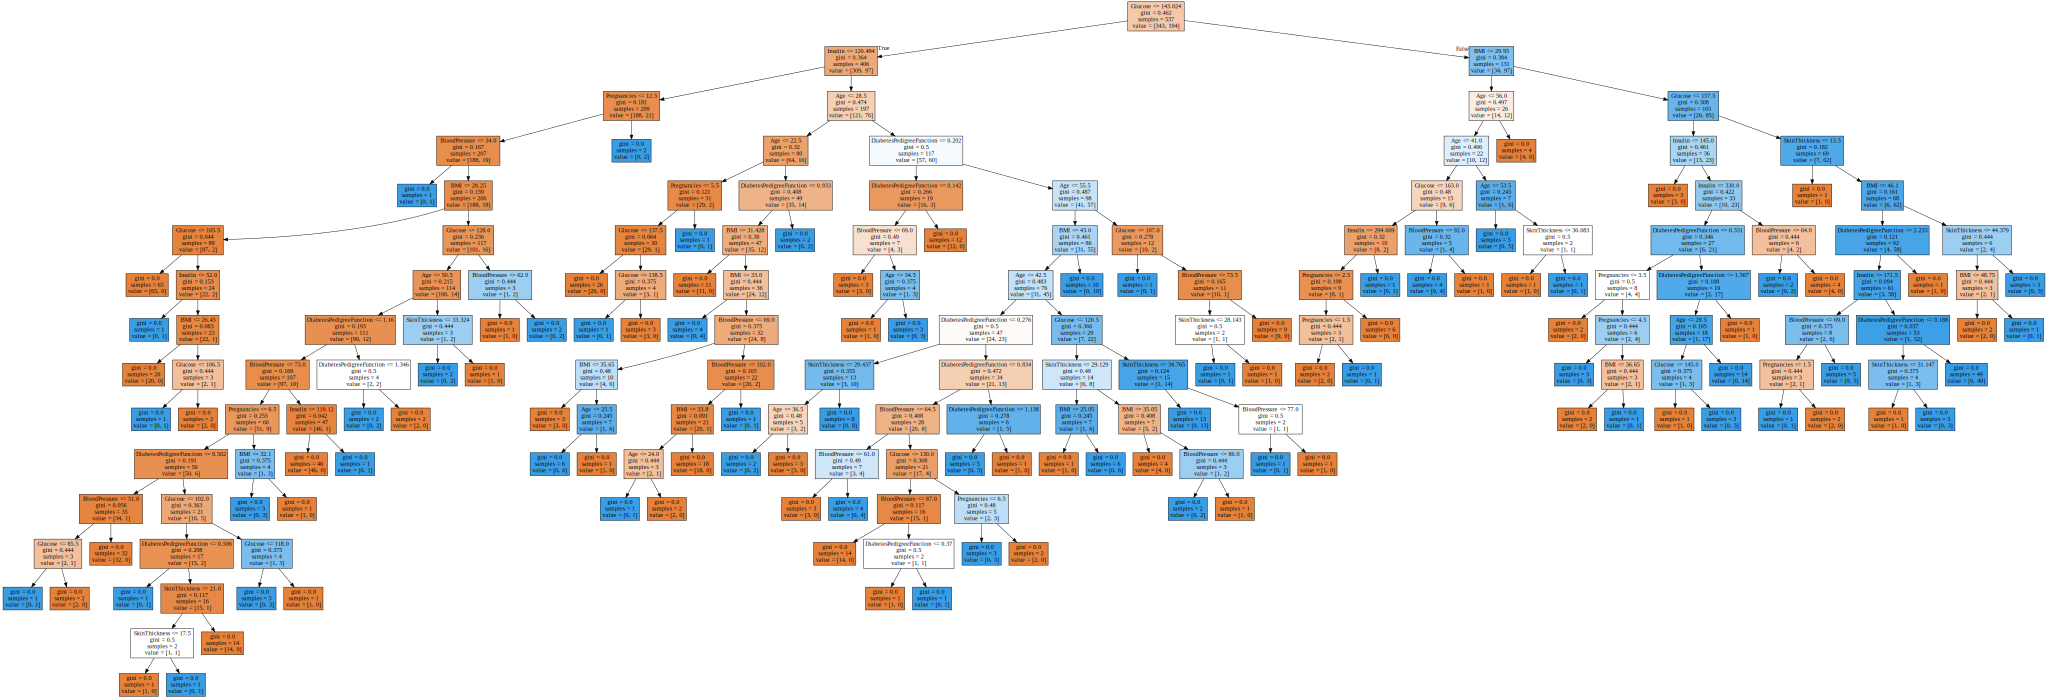

In [142]:
# Let's plot a decision tree source : #https://www.kaggle.com/willkoehrsen/visualize-a-decision-tree-w-python-scikit-learn
# Since there are a lot of attributes, it is difficult to actually make sense of the decision tree graph in this notebook. 
# It is advised to export it as png and view it.

from sklearn import tree
import graphviz

tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=feature_names,filled = True)
graphviz.Source(tree_graph)

conda install python-graphviz

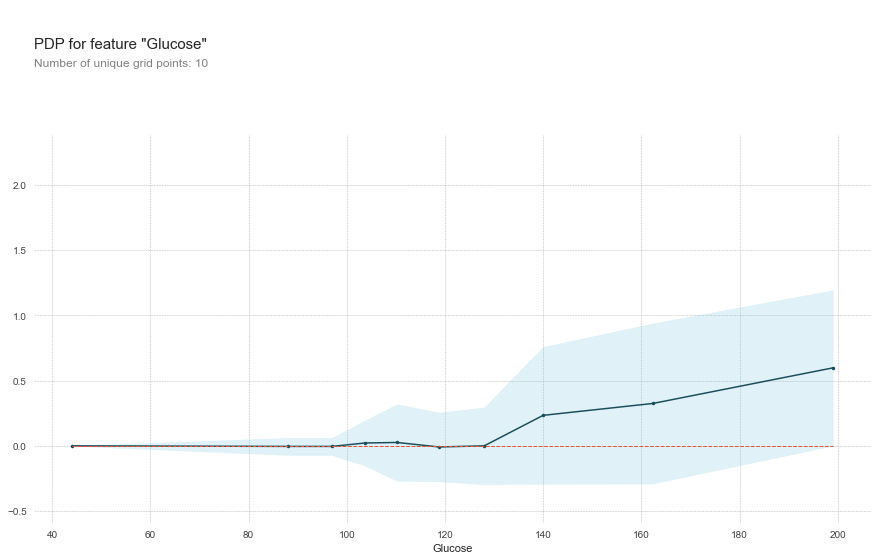

In [143]:
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=tree_model, dataset=x_test, model_features=feature_names, feature='Glucose')

# plot it
pdp.pdp_plot(pdp_goals, 'Glucose')
plt.show()

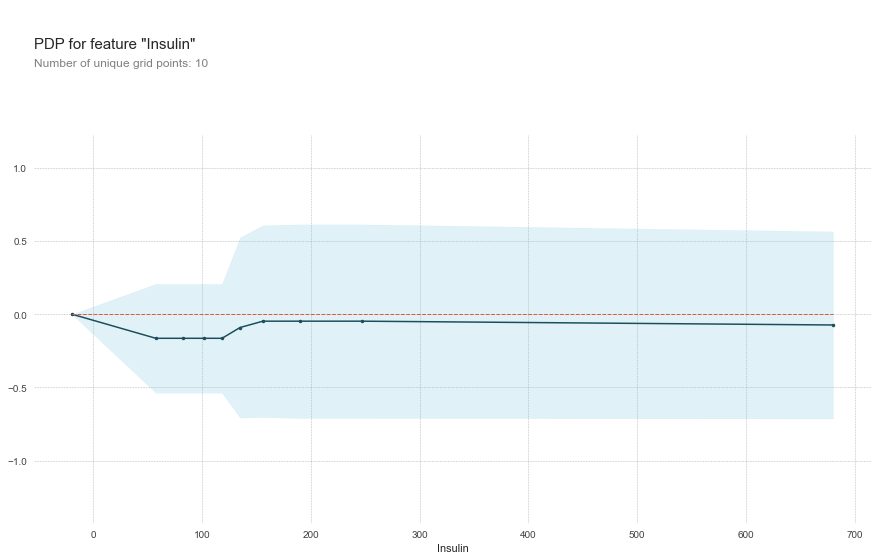

In [144]:
#Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=tree_model, dataset=x_test, model_features=feature_names, feature='Insulin')

# plot it
pdp.pdp_plot(pdp_goals, 'Insulin')
plt.show()

features_to_plot = ['Glucose','Insulin']
inter1  =  pdp.pdp_interact(model=tree_model, dataset=x_test, model_features=feature_names, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour', plot_pdp=True)
plt.show()

In [145]:
import h2o
import time

import itertools


from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator


In [146]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (build 11.0.6+8-b765.1, mixed mode)
  Starting server from c:\users\harsha.teja\anaconda3\envs\pycaret\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\HARSHA~1.TEJ\AppData\Local\Temp\tmporoqe_zt
  JVM stdout: C:\Users\HARSHA~1.TEJ\AppData\Local\Temp\tmporoqe_zt\h2o_harsha_teja_started_from_python.out
  JVM stderr: C:\Users\HARSHA~1.TEJ\AppData\Local\Temp\tmporoqe_zt\h2o_harsha_teja_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ---------------------------------------------------------
H2O_cluster_uptime:         05 secs
H2O_cluster_timezone:       Asia/Kolkata
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.30.1.2
H2O_cluster_version_age:    18 days
H2O_cluster_name:           H2O_from_python_harsha_teja_4mxkpf
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    1.975 Gb
H2O_cluster_total_cores:    0
H2O_cluster_allowed_cores:  0
H2O_cluster_status:         accepting new members, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.7.9 final
--------------------------  ---------------------------------------------------------

In [147]:
diabetes_df = h2o.import_file("C:\\Users\\harsha.teja\\Desktop\\myg\\major project\\Data-Science-Capstone-Projects-master\\Data-Science-Capstone-Projects-master\\Project_2\\Project 2\\Healthcare - Diabetes\\health care diabetes.csv",destination_frame="diabetes_df")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [148]:
diabetes_df.describe()

Rows:768
Cols:9




Pregnancies Glucose BloodPressure SkinThickness Insulin BMI DiabetesPedigreeFunction Age Outcome 
 
 
 type int int int int int real real int int 
 mins 0.0 0.0 0.0 0.0 0.0 0.0 0.078 21.0 0.0 
 mean 3.845052083333336 120.89453125 69.10546874999994 20.536458333333357 79.79947916666666 31.99257812500003 0.4718763020833334 33.240885416666615 0.3489583333333333 
 maxs 17.0 199.0 122.0 99.0 846.0 67.1 2.42 81.0 1.0 
 sigma 3.36957806269887 31.972618195136224 19.355807170644777 15.952217567727642 115.24400235133803 7.884160320375441 0.331328595012775 11.760231540678689 0.47695137724279896 
 zeros 111 5 35 227 374 11 0 0 500 
 missing 0 0 0 0 0 0 0 0 0 
 0 6.0 148.0 72.0 35.0 0.0 33.6 0.627 50.0 1.0 
 1 1.0 85.0 66.0 29.0 0.0 26.6 0.351 31.0 0.0 
 2 8.0 183.0 64.0 0.0 0.0 23.3 0.672 32.0 1.0 
 3 1.0 89.0 66.0 23.0 94.0 28.1 0.167 21.0 0.0 
 4 0.0 137.0 40.0 35.0 168.0 43.1 2.288 33.0 1.0 
 5 5.0 116.0 74.0 0.0 0.0 25.6 0.201 30.0 0.0 
 6 3.0 78.0 50.0 32.0 88.0 31.0 0.248 26.0 1.0 
 7 10.0 115.0 0.0 0.0 0.0 35.3 0.134 29.0 0.0 
 8 2.0 197.0 70.0 45.0 543.0 30.5 0.158 53.0 1.0 
 9 8.0 125.0 96.0 0.0 0.0 0.0 0.232 54.0 1.0

In [149]:
train, valid, test = diabetes_df.split_frame(ratios=[0.6,0.2], seed=1234)
response = "Outcome"
train[response] = train[response].asfactor()
valid[response] = valid[response].asfactor()
test[response] = test[response].asfactor()
print("Number of rows in train, valid and test set : ", train.shape[0], valid.shape[0], test.shape[0])

Number of rows in train, valid and test set :  465 148 155


In [150]:
response

'Outcome'

In [151]:
predictors = diabetes_df.columns[:-1]
gbm = H2OGradientBoostingEstimator()
gbm.train(x=predictors, y=response, training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [152]:
predictors

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [153]:
print(gbm)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1600757206177_1


Model Summary: 


number_of_trees  number_of_internal_trees  model_size_in_bytes  min_depth  max_depth  mean_depth  min_leaves  max_leaves  mean_leaves
0              50.00                     50.00             11548.00       5.00       5.00        5.00        6.00       23.00        13.68



ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.05394537414652564
RMSE: 0.2322614349101582
LogLoss: 0.21164045617145613
Mean Per-Class Error: 0.05419671999032927
AUC: 0.9899262602248459
AUCPR: 0.9845164166436653
Gini: 0.9798525204496917

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46220528851885034: 


0      1   Error           Rate
0      0 290.00   9.00  0.0301    (9.0/299.0)
1      1  14.00 152.00  0.0843   (14.0/166.0)
2  Total 304.00 161.00  0.0495   (23.0/465.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold  value    idx
0                        max f1       0.46   0.93 150.00
1                        max f2       0.32   0.94 176.00
2                  max f0point5       0.55   0.97 132.00
3                  max accuracy       0.51   0.95 142.00
4                 max precision       0.98   1.00   0.00
5                    max recall       0.17   1.00 227.00
6               max specificity       0.98   1.00   0.00
7              max absolute_mcc       0.51   0.89 142.00
8    max min_per_class_accuracy       0.37   0.94 163.00
9   max mean_per_class_accuracy       0.37   0.95 164.00
10                      max tns       0.98 299.00   0.00
11                      max fns       0.98 165.00   0.00
12                      max fps       0.02 299.00 399.00
13                      max tps       0.17 166.00 227.00
14                      max tnr       0.98   1.00   0.00
15                      max fnr       0.98   0.99   0.00
16                      max fpr       0.02   1.00 399.00
17                      max tpr       0.17   1.00 227.00


Gains/Lift Table: Avg response rate: 35.70 %, avg score: 35.71 %


group  cumulative_data_fraction  lower_threshold  lift  cumulative_lift  response_rate  score  cumulative_response_rate  cumulative_score  capture_rate  cumulative_capture_rate    gain  cumulative_gain  kolmogorov_smirnov
0       1                      0.01             0.96  2.80             2.80           1.00   0.97                      1.00              0.97          0.03                     0.03  180.12           180.12                0.03
1       2                      0.02             0.96  2.80             2.80           1.00   0.96                      1.00              0.97          0.03                     0.06  180.12           180.12                0.06
2       3                      0.03             0.95  2.80             2.80           1.00   0.95                      1.00              0.96          0.02                     0.08  180.12           180.12                0.08
3       4                      0.04             0.94  2.80             2.80           1.00   0.95                      1.00              0.96          0.03                     0.11  180.12           180.12                0.11
4       5                      0.05             0.94  2.80             2.80           1.00   0.94                      1.00              0.96          0.03                     0.14  180.12           180.12                0.14
5       6                      0.10             0.91  2.80             2.80           1.00   0.92                      1.00              0.94          0.14                     0.28  180.12           180.12                0.28
6       7                      0.15             0.87  2.80             2.80           1.00   0.89                      1.00              0.92          0.14                     0.42  180.12           180.12                0.42
7       8                      0.20             0.80  2.80             2.80           1.00   0.83                      1.00              0.90          0.14                     0.56  180.12           180.12                0.56
8       9                      0.30             0.56  2.80             2.80           1.00   0.68                      1.00              0.83          0.28                     0.84  180.12           180.12                0.84
9      10                      0.40             0.33  1.16             2.39           0.41   0.44                      0.85              0.73          0.11                     0.96   15.70           139.46                0.87
10     11                      0.50             0.19  0.36             1.98           0.13   0.26                      0.71              0.64          0.04                     0.99  -64.24            98.37                0.77
11     12                      0.60             0.12  0.06             1.67           0.02   0.15                      0.59              0.56          0.01                     1.00  -93.91            66.67                0.62
12     13                      0.70             0.08  0.00             1.43           0.00   0.10                      0.51              0.49          0.00                     1.00 -100.00            43.08                0.47
13     14                      0.80             0.05  0.00             1.25           0.00   0.07                      0.45              0.44          0.00                     1.00 -100.00            25.00                0.31
14     15                      0.90             0.03  0.00             1.11           0.00   0.04                      0.40              0.39          0.00                     1.00 -100.00            11.24                0.16
15     16                      1.00             0.02  0.00             1.00           0.00   0.03                      0.36              0.36          0.00                     1.00 -100.00             0.00                0.00



Scoring History: 


timestamp    duration  number_of_trees  training_rmse  training_logloss  training_auc  training_pr_auc  training_lift  training_classification_error
0     2020-09-22 12:16:56   0.055 sec             0.00           0.48              0.65          0.50             0.36           1.00                           0.64
1     2020-09-22 12:16:57   0.422 sec             1.00           0.46              0.61          0.90             0.84           2.80                           0.18
2     2020-09-22 12:16:57   0.474 sec             2.00           0.44              0.57          0.92             0.87           2.80                           0.15
3     2020-09-22 12:16:57   0.505 sec             3.00           0.42              0.54          0.92             0.87           2.80                           0.16
4     2020-09-22 12:16:57   0.570 sec             4.00           0.41              0.51          0.93             0.88           2.80                           0.15
5     2020-09-22 12:16:57   0.591 sec             5.00           0.39              0.49          0.93             0.89           2.80                           0.14
6     2020-09-22 12:16:57   0.615 sec             6.00           0.38              0.46          0.94             0.90           2.80                           0.14
7     2020-09-22 12:16:57   0.641 sec             7.00           0.37              0.45          0.94             0.90           2.80                           0.14
8     2020-09-22 12:16:57   0.669 sec             8.00           0.36              0.43          0.94             0.91           2.80                           0.13
9     2020-09-22 12:16:57   0.693 sec             9.00           0.36              0.42          0.94             0.91           2.80                           0.13
10    2020-09-22 12:16:57   0.722 sec            10.00           0.35              0.40          0.95             0.91           2.80                           0.14
11    2020-09-22 12:16:57   0.752 sec            11.00           0.34              0.39          0.95             0.92           2.80                           0.13
12    2020-09-22 12:16:57   0.771 sec            12.00           0.34              0.38          0.95             0.92           2.80                           0.13
13    2020-09-22 12:16:57   0.789 sec            13.00           0.33              0.37          0.95             0.92           2.80                           0.14
14    2020-09-22 12:16:57   0.809 sec            14.00           0.32              0.36          0.95             0.93           2.80                           0.13
15    2020-09-22 12:16:57   0.827 sec            15.00           0.32              0.35          0.95             0.93           2.80                           0.12
16    2020-09-22 12:16:57   0.848 sec            16.00           0.32              0.35          0.96             0.93           2.80                           0.11
17    2020-09-22 12:16:57   0.879 sec            17.00           0.31              0.34          0.96             0.94           2.80                           0.11
18    2020-09-22 12:16:57   0.897 sec            18.00           0.31              0.33          0.96             0.94           2.80                           0.10
19    2020-09-22 12:16:57   0.916 sec            19.00           0.30              0.32          0.96             0.94           2.80                           0.10


See the whole table with table.as_data_frame()

Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0                   Glucose               160.89               1.00        0.39
1                       BMI               107.16               0.67        0.26
2  DiabetesPedigreeFunction                49.38               0.31        0.12
3                       Age                28.79               0.18        0.07
4             BloodPressure                24.52               0.15        0.06
5               Pregnancies                22.06               0.14        0.05
6                   Insulin                12.95               0.08        0.03
7             SkinThickness                10.95               0.07        0.03

In [154]:
perf = gbm.model_performance(valid)
print(perf)



ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.18115330538099383
RMSE: 0.4256210819273334
LogLoss: 0.5366686568411096
Mean Per-Class Error: 0.25621588841722254
AUC: 0.804932282191227
AUCPR: 0.6470306042290592
Gini: 0.6098645643824541

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1458393490707833: 


0     1   Error           Rate
0      0 53.00 44.00  0.4536    (44.0/97.0)
1      1  3.00 48.00  0.0588     (3.0/51.0)
2  Total 56.00 92.00  0.3176   (47.0/148.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold  value    idx
0                        max f1       0.15   0.67  91.00
1                        max f2       0.11   0.82 106.00
2                  max f0point5       0.67   0.64  31.00
3                  max accuracy       0.67   0.75  31.00
4                 max precision       0.98   1.00   0.00
5                    max recall       0.11   1.00 106.00
6               max specificity       0.98   1.00   0.00
7              max absolute_mcc       0.15   0.48  91.00
8    max min_per_class_accuracy       0.33   0.69  64.00
9   max mean_per_class_accuracy       0.15   0.74  91.00
10                      max tns       0.98  97.00   0.00
11                      max fns       0.98  50.00   0.00
12                      max fps       0.02  97.00 147.00
13                      max tps       0.11  51.00 106.00
14                      max tnr       0.98   1.00   0.00
15                      max fnr       0.98   0.98   0.00
16                      max fpr       0.02   1.00 147.00
17                      max tpr       0.11   1.00 106.00


Gains/Lift Table: Avg response rate: 34.46 %, avg score: 36.45 %


group  cumulative_data_fraction  lower_threshold  lift  cumulative_lift  response_rate  score  cumulative_response_rate  cumulative_score  capture_rate  cumulative_capture_rate    gain  cumulative_gain  kolmogorov_smirnov
0       1                      0.01             0.97  1.45             1.45           0.50   0.98                      0.50              0.98          0.02                     0.02   45.10            45.10                0.01
1       2                      0.02             0.97  2.90             1.93           1.00   0.97                      0.67              0.98          0.02                     0.04  190.20            93.46                0.03
2       3                      0.03             0.95  2.90             2.32           1.00   0.96                      0.80              0.97          0.04                     0.08  190.20           132.16                0.07
3       4                      0.04             0.93  2.90             2.42           1.00   0.94                      0.83              0.97          0.02                     0.10  190.20           141.83                0.09
4       5                      0.05             0.92  1.45             2.18           0.50   0.93                      0.75              0.96          0.02                     0.12   45.10           117.65                0.10
5       6                      0.10             0.89  2.07             2.13           0.71   0.91                      0.73              0.93          0.10                     0.22  107.28           112.81                0.17
6       7                      0.16             0.84  2.18             2.14           0.75   0.86                      0.74              0.91          0.12                     0.33  117.65           114.49                0.27
7       8                      0.20             0.72  1.66             2.03           0.57   0.77                      0.70              0.88          0.08                     0.41   65.83           103.14                0.32
8       9                      0.30             0.52  1.55             1.87           0.53   0.61                      0.64              0.79          0.16                     0.57   54.77            87.02                0.40
9      10                      0.40             0.41  1.04             1.67           0.36   0.46                      0.58              0.71          0.10                     0.67    3.64            67.23                0.41
10     11                      0.50             0.26  0.97             1.53           0.33   0.31                      0.53              0.63          0.10                     0.76   -3.27            52.94                0.40
11     12                      0.60             0.15  1.35             1.50           0.47   0.20                      0.52              0.56          0.14                     0.90   35.42            49.99                0.46
12     13                      0.70             0.12  0.62             1.38           0.21   0.13                      0.48              0.50          0.06                     0.96  -37.82            38.05                0.40
13     14                      0.80             0.06  0.39             1.25           0.13   0.09                      0.43              0.45          0.04                     1.00  -61.31            25.42                0.31
14     15                      0.90             0.04  0.00             1.11           0.00   0.05                      0.38              0.40          0.00                     1.00 -100.00            11.28                0.15
15     16                      1.00             0.02  0.00             1.00           0.00   0.03                      0.34              0.36          0.00                     1.00 -100.00             0.00                0.00

In [155]:
gbm_tune = H2OGradientBoostingEstimator(
    ntrees = 3000,
    learn_rate = 0.01,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    col_sample_rate = 0.7,
    sample_rate = 0.7,
    seed = 1234
)      
gbm_tune.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [156]:
gbm_tune.model_performance(valid).auc()

0.8019001414998989

In [157]:
from h2o.grid.grid_search import H2OGridSearch

gbm_grid = H2OGradientBoostingEstimator(
    ntrees = 3000,
    learn_rate = 0.01,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    col_sample_rate = 0.7,
    sample_rate = 0.7,
    seed = 1234
) 

hyper_params = {'max_depth':[4,6,8,10,12]}
grid = H2OGridSearch(gbm_grid, hyper_params,
                         grid_id='depth_grid',
                         search_criteria={'strategy': "Cartesian"})


In [158]:
print(grid)


Grid Search of Model H2OGradientBoostingEstimator: 


Model Hyperparameters: [max_depth]
0      1                          [4]
1      2                          [6]
2      3                          [8]
3      4                         [10]
4      5                         [12]

#Train grid search
grid.train(x=predictors, 
           y=response,
           training_frame=train,
           validation_frame=valid)

sorted_grid = grid.get_grid(sort_by='auc',decreasing=True)
print(sorted_grid)

In [159]:
cv_gbm = H2OGradientBoostingEstimator(
    ntrees = 3000,
    learn_rate = 0.05,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    nfolds=4, 
    seed=2018)
cv_gbm.train(x = predictors, y = response, training_frame = train, validation_frame=valid)
cv_summary = cv_gbm.cross_validation_metrics_summary().as_data_frame()
cv_summary

gbm Model Build progress: |███████████████████████████████████████████████| 100%


mean           sd  cv_1_valid  cv_2_valid  cv_3_valid  cv_4_valid
0                  accuracy   0.8060614  0.028866975  0.81512606  0.84166664       0.775   0.7924528
1                       auc  0.83460003    0.0253348   0.8711854  0.82493657  0.81303704   0.8292411
2                     aucpr   0.7332863   0.08590643  0.77500844  0.60952866   0.7449944   0.8036139
3                       err  0.19393861  0.028866975  0.18487395  0.15833333       0.225  0.20754717
4                 err_count        22.5    3.3166249        22.0        19.0        27.0        22.0
5                  f0point5   0.7166275  0.023856336   0.7432432   0.6993007   0.6938776   0.7300885
6                        f1   0.7359389  0.051860016         0.8   0.6779661   0.7157895        0.75
7                        f2  0.75854874  0.086101264  0.86614174  0.65789473  0.73913044  0.77102804
8            lift_top_group   2.0913858    0.6500798   1.2395834   1.9354838   2.6666667   2.5238094
9                   logloss   0.4842181   0.03085123  0.46077308  0.45635447  0.52019364  0.49955118
10      max_per_class_error   0.2667725  0.061059155   0.2535211   0.3548387  0.24444444  0.21428572
11                      mcc  0.58331674  0.049473092  0.65121645   0.5746587   0.5324516   0.5749401
12  mean_per_class_accuracy  0.79290384  0.027116295   0.8315728   0.7776368  0.77111113  0.79129463
13     mean_per_class_error  0.20709616  0.027116295  0.16842723  0.22236317  0.22888888  0.20870535
14                      mse   0.1554569  0.008760154  0.14931631  0.14733355  0.16610987   0.1590679
15                   pr_auc   0.7332863   0.08590643  0.77500844  0.60952866   0.7449944   0.8036139
16                precision   0.7053386  0.017187094   0.7096774  0.71428573        0.68   0.7173913
17                       r2  0.30923334   0.06338601  0.37955743  0.23102464  0.29126453  0.33508673
18                   recall   0.7757745   0.11168112   0.9166667   0.6451613  0.75555557  0.78571427
19                     rmse  0.39416355  0.011076028  0.38641468  0.38384053   0.4075658  0.39883316
20              specificity   0.8100332  0.070176266  0.74647886   0.9101124   0.7866667    0.796875

In [160]:
cv_gbm.model_performance(valid).auc()

0.8059429957550029

In [161]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_models = 10, max_runtime_secs=100, seed = 1)
aml.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

AutoML progress: |
12:17:07.833: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
12:17:07.904: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


In [162]:
lb = aml.leaderboard
lb

model_id auc logloss aucpr mean_per_class_error rmse mse 
 
 
 GBM_grid__1_AutoML_20200922_121707_model_1 0.839203 0.466923 0.766707 0.229853 0.388247 0.150736 
 StackedEnsemble_AllModels_AutoML_20200922_121707 0.834539 0.476574 0.718907 0.240198 0.392271 0.153877 
 GBM_4_AutoML_20200922_121707 0.833834 0.481036 0.731971 0.231867 0.391594 0.153346 
 StackedEnsemble_BestOfFamily_AutoML_20200922_121707 0.833199 0.476681 0.726467 0.240893 0.392853 0.154333 
 GLM_1_AutoML_20200922_121707 0.831638 0.488798 0.716653 0.238204 0.395915 0.156749 
 DRF_1_AutoML_20200922_121707 0.826712 0.555116 0.729784 0.237196 0.397308 0.157854 
 GBM_1_AutoML_20200922_121707 0.82373 0.502779 0.732807 0.240541 0.40097 0.160777 
 XRT_1_AutoML_20200922_121707 0.823498 0.490522 0.72588 0.242203 0.399794 0.159835 
 GBM_5_AutoML_20200922_121707 0.819045 0.495412 0.690114 0.239201 0.403307 0.162657 
 GBM_2_AutoML_20200922_121707 0.817373 0.50269 0.707705 0.251914 0.403486 0.162801

In [163]:
cd C:\Users\harsha.teja\Desktop\copy\major project\Data-Science-Capstone-Projects-master\Data-Science-Capstone-Projects-master\Project_2\Project 2\Healthcare - Diabetes/

C:\Users\harsha.teja\Desktop\copy\major project\Data-Science-Capstone-Projects-master\Data-Science-Capstone-Projects-master\Project_2\Project 2\Healthcare - Diabetes


In [164]:
import pandas as pd
import numpy as np
data = pd.read_csv('health care diabetes.csv')

In [165]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0 33.60                      0.63   50        1
1            1       85             66             29        0 26.60                      0.35   31        0
2            8      183             64              0        0 23.30                      0.67   32        1
3            1       89             66             23       94 28.10                      0.17   21        0
4            0      137             40             35      168 43.10                      2.29   33        1

# Loading data from pycaret
from pycaret.datasets import get_data
data = get_data('juice') 

In [166]:
# Importing module and initializing setup
from pycaret.classification import *
clf1 = setup(data = data, target = 'Outcome')

Setup Succesfully Completed!


INFO:logs:create_model_container 0
INFO:logs:master_model_container 0
INFO:logs:display_container 0
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Outcome',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Le...
                ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                ('P_transform', Empty()), ('pt_target', Empty()),
                ('binn', Empty()), ('rem_outliers', Empty()),
     

In [167]:
compare_models()

INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=4482, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=4482, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

from pycaret.regression import *
reg1 = setup(data = boston, target = 'medv')

In [168]:
# return best model
best = compare_models()
# return top 3 models based on 'Accuracy'
top3 = compare_models(n_select = 3)
# return best model based on AUC
best = compare_models(sort = 'AUC') #default is 'Accuracy'
# compare specific models
#best_specific = compare_models(whitelist = ['dt','rf','xgboost'])
# blacklist certain models
#best_specific = compare_models(blacklist = ['catboost', 'svm'])

INFO:logs:create_model_container: 6
INFO:logs:master_model_container: 6
INFO:logs:display_container: 10
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=4482, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [169]:
clf1 = setup(data = data, target = 'Outcome')

Setup Succesfully Completed!


INFO:logs:create_model_container 0
INFO:logs:master_model_container 0
INFO:logs:display_container 0
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Outcome',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Le...
                ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                ('P_transform', Empty()), ('pt_target', Empty()),
                ('binn', Empty()), ('rem_outliers', Empty()),
     

In [170]:
# train logistic regression model
lr = create_model('lr') #lr is the id of the model



INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 1
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2068, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [222]:
# train DT model
dt= create_model('dt') #lr is the id of the model


INFO:logs:create_model_container: 33
INFO:logs:master_model_container: 33
INFO:logs:display_container: 38
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2068, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [225]:
# tune hyperparameters of decision tree
tuned_dt = tune_model(dt)
# tune hyperparameters with increased n_iter
tuned_dt = tune_model(dt, n_iter = 50)
# tune hyperparameters to optimize AUC
tuned_lr = tune_model(dt, optimize = 'AUC') #default is 'Accuracy'
# tune hyperparameters with custom_grid
params = {"max_depth": np.random.randint(1, (len(data.columns)*.85),20),
          "max_features": np.random.randint(1, len(data.columns),20),
          "min_samples_leaf": [2,3,4,5,6],
          "criterion": ["gini", "entropy"]
          }
tuned_dt_custom = tune_model(dt, custom_grid = params)
# tune multiple models dynamically
top3 = compare_models(n_select = 3)
tuned_top3 = [tune_model(i) for i in top3]

INFO:logs:create_model_container: 63
INFO:logs:master_model_container: 63
INFO:logs:display_container: 71
INFO:logs:XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.62, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=2068, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=0)
INFO:logs:tune_model() succesfully completed......................................


In [171]:
# check the model library to see all models
models()

Name                                    Reference  Turbo
ID                                                                                           
lr                    Logistic Regression      sklearn.linear_model.LogisticRegression   True
knn                K Neighbors Classifier       sklearn.neighbors.KNeighborsClassifier   True
nb                            Naive Bayes               sklearn.naive_bayes.GaussianNB   True
dt               Decision Tree Classifier          sklearn.tree.DecisionTreeClassifier   True
svm                   SVM - Linear Kernel           sklearn.linear_model.SGDClassifier   True
rbfsvm                SVM - Radial Kernel                              sklearn.svm.SVC  False
gpc           Gaussian Process Classifier                 sklearn.gaussian_process.GPC  False
mlp                        MLP Classifier         sklearn.neural_network.MLPClassifier  False
ridge                    Ridge Classifier         sklearn.linear_model.RidgeClassifier   True
rf               Random Forest Classifier      sklearn.ensemble.RandomForestClassifier   True
qda       Quadratic Discriminant Analysis            sklearn.discriminant_analysis.QDA   True
ada                  Ada Boost Classifier          sklearn.ensemble.AdaBoostClassifier   True
gbc          Gradient Boosting Classifier  sklearn.ensemble.GradientBoostingClassifier   True
lda          Linear Discriminant Analysis            sklearn.discriminant_analysis.LDA   True
et                 Extra Trees Classifier        sklearn.ensemble.ExtraTreesClassifier   True
xgboost         Extreme Gradient Boosting                       xgboost.readthedocs.io   True
lightgbm  Light Gradient Boosting Machine                github.com/microsoft/LightGBM   True
catboost              CatBoost Classifier                                  catboost.ai   True

In [186]:
rf.classes_

array([0, 1])

In [172]:
# train rf model using 5 fold CV
rf = create_model('rf', fold = 10)


INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=2068, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [187]:
# tune hyperparameters of decision tree
tuned_dt = tune_model(rf)
# tune hyperparameters with increased n_iter
tuned_dt = tune_model(rf, n_iter = 50)
# tune hyperparameters to optimize AUC
tuned_dt = tune_model(rf, optimize = 'AUC') #default is 'Accuracy'
# tune hyperparameters with custom_grid
params = {"max_depth": np.random.randint(1, (len(data.columns)*.85),20),
          "max_features": np.random.randint(1, len(data.columns),20),
          "min_samples_leaf": [2,3,4,5,6],
          "criterion": ["gini", "entropy"]
          }
tuned_dt_custom = tune_model(rf, custom_grid = params)
# tune multiple models dynamically
top3 = compare_models(n_select = 3)
tuned_top3 = [tune_model(i) for i in top3]

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 23
INFO:logs:XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.62, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=2068, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=0)
INFO:logs:tune_model() succesfully completed......................................


In [211]:
pred_holdout = predict_model(rf)


Model  Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0  Random Forest Classifier      0.72 0.78    0.49   0.63 0.56   0.36 0.36

In [212]:
pred_holdout1 = predict_model(lr)

Model  Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0  Logistic Regression      0.74 0.80    0.54   0.65 0.59   0.40 0.40

In [216]:
cd C:\Users\harsha.teja\Desktop\myg\major project\Data-Science-Capstone-Projects-master\Data-Science-Capstone-Projects-master\Project_2\Project 2\Healthcare - Diabetes

C:\Users\harsha.teja\Desktop\myg\major project\Data-Science-Capstone-Projects-master\Data-Science-Capstone-Projects-master\Project_2\Project 2\Healthcare - Diabetes


In [217]:
# finalize a model
lr_final = finalize_model(lr)
# importing unseen data 
import pandas as pd
data_unseen = pd.read_csv('diabetes.csv') 
# generate predictions on unseen data
predictions = predict_model(lr_final, data = data_unseen)

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2068, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), ensemble=False, method=None, fold=10, round=4, cross_validation=True, verbose=False, system=False)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:Copying training dataset
INFO:logs:Importing libraries
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Declaring custom model
INFO:logs:Logistic Regression Imported succesfully
INFO:logs:Checking ensemble method
INFO:logs:Initializing Fold 1
INFO:logs:Fitting Model
INFO:logs:Evaluating Metrics
INFO:logs:Compiling Metrics
INFO:logs:Ini

In [218]:
predictions 

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome Label  Score
0              6      148             72             35        0 33.60                      0.63   50        1     1   0.57
1              1       85             66             29        0 26.60                      0.35   31        0     0   0.07
2              8      183             64              0        0 23.30                      0.67   32        1     1   0.91
3              1       89             66             23       94 28.10                      0.17   21        0     0   0.07
4              0      137             40             35      168 43.10                      2.29   33        1     1   0.88
..           ...      ...            ...            ...      ...   ...                       ...  ...      ...   ...    ...
763           10      101             76             48      180 32.90                      0.17   63        0     0   0.25
764            2      122             70             27        0 36.80                      0.34   27        0     0   0.19
765            5      121             72             23      112 26.20                      0.24   30        0     0   0.27
766            1      126             60              0        0 30.10                      0.35   47        1     0   0.23
767            1       93             70             31        0 30.40                      0.32   23        0     0   0.10

[768 rows x 11 columns]

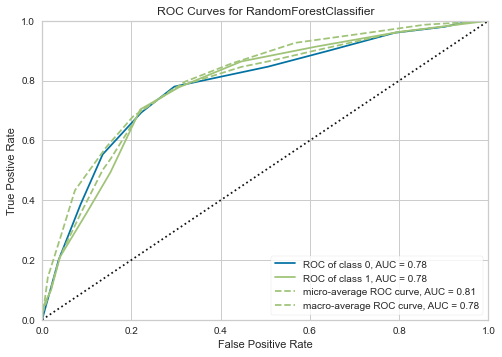

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [188]:
# plotting a model
plot_model(rf)

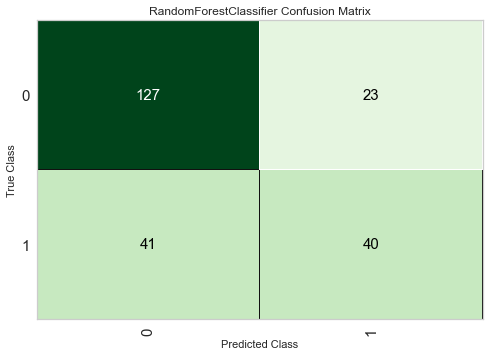

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [190]:
plot_model(rf,plot = 'confusion_matrix')

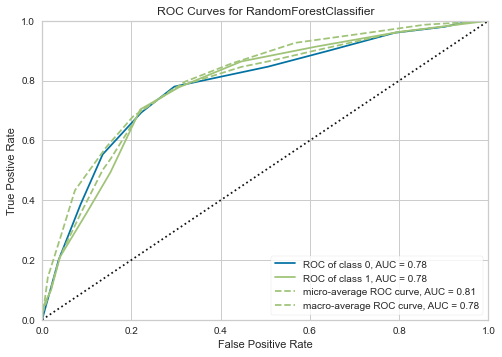

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [194]:
plot_model(rf,plot = 'auc')

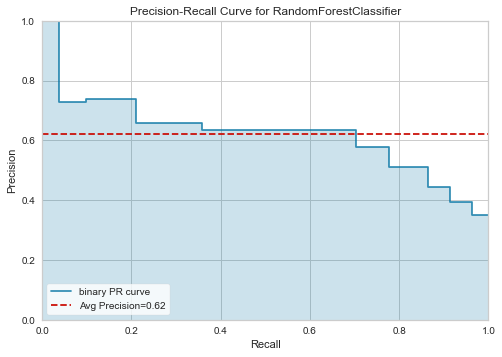

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [195]:
plot_model(rf,plot = 'pr')

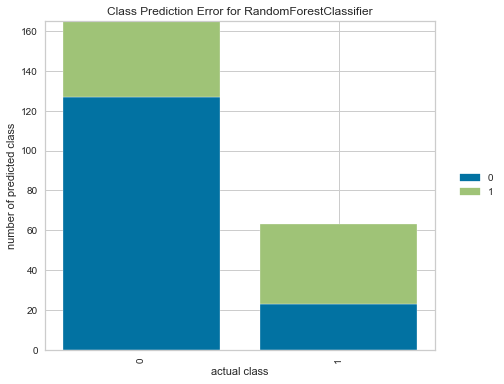

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [197]:
plot_model(rf,plot = 'error')

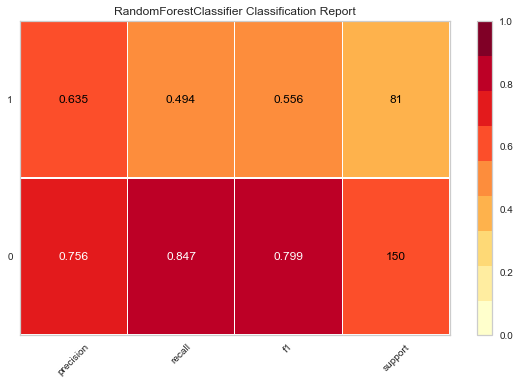

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [198]:
plot_model(rf,plot = 'class_report')

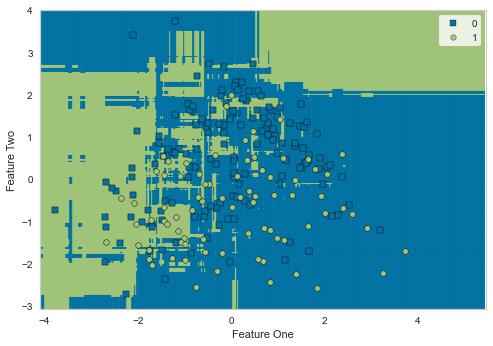

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [199]:
plot_model(rf,plot = 'boundary')

In [207]:
plot_model(rf,plot = 'parameter')

Parameters
bootstrap                      True
ccp_alpha                      0.00
class_weight                   None
criterion                      gini
max_depth                      None
max_features                   auto
max_leaf_nodes                 None
max_samples                    None
min_impurity_decrease          0.00
min_impurity_split             None
min_samples_leaf                  1
min_samples_split                 2
min_weight_fraction_leaf       0.00
n_estimators                     10
n_jobs                           -1
oob_score                     False
random_state                   2068
verbose                           0
warm_start                    False

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


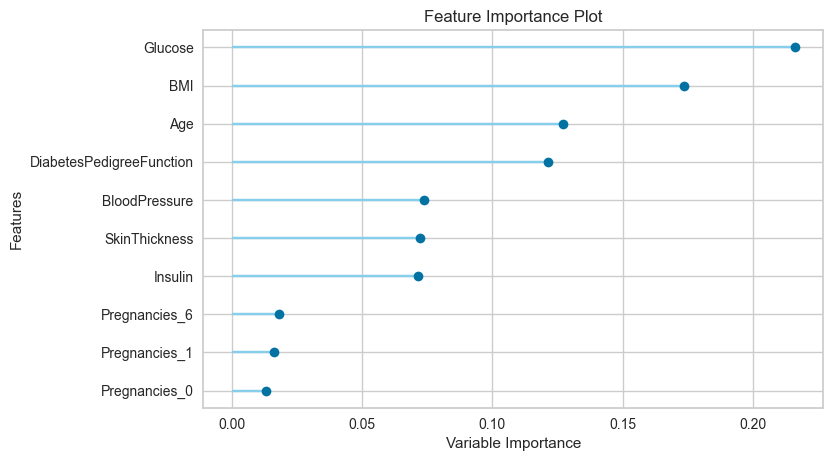

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [206]:
plot_model(rf,plot = 'feature')

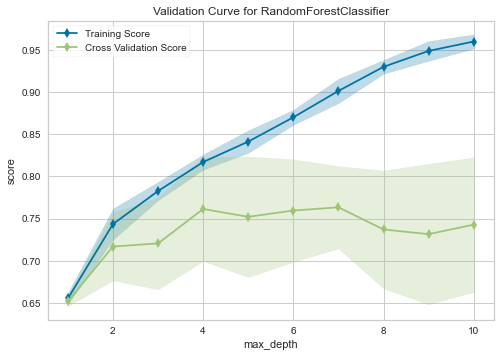

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [205]:
plot_model(rf,plot = 'vc')

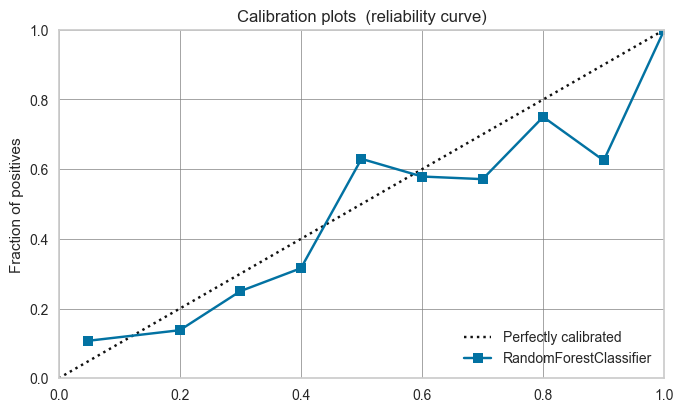

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [204]:
plot_model(rf,plot = 'calibration')

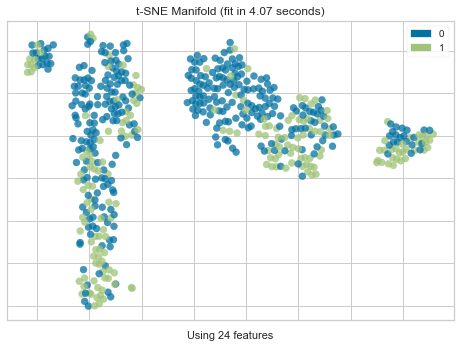

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [202]:
plot_model(rf,plot = 'manifold')

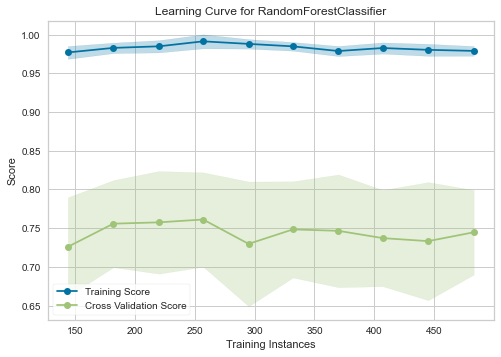

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [208]:
plot_model(rf,plot = 'learning')

In [203]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0 33.60                      0.63   50        1
1            1       85             66             29        0 26.60                      0.35   31        0
2            8      183             64              0        0 23.30                      0.67   32        1
3            1       89             66             23       94 28.10                      0.17   21        0
4            0      137             40             35      168 43.10                      2.29   33        1

In [219]:
save_model(rf, 'rf_saved_07032020')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=2068, verbose=0,
                       warm_start=False), model_name=rf_saved_07032020, model_only=False, verbose=True)
INFO:logs:Adding model into prep_pipe


Transformation Pipeline and Model Succesfully Saved


INFO:logs:rf_saved_07032020.pkl saved in current working directory
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Outcome',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Le...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                      

In [173]:
# train svm model without CV
svm = create_model('svm', cross_validation = False)


INFO:logs:create_model_container 2
INFO:logs:master_model_container 2
INFO:logs:display_container 2
INFO:logs:SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=2068, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:create_models() succesfully completed......................................


In [174]:
# train xgboost model with max_depth = 10
xgboost = create_model('xgboost', max_depth = 5)

INFO:logs:create_model_container: 3
INFO:logs:master_model_container: 3
INFO:logs:display_container: 3
INFO:logs:XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=2068, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)
INFO:logs:create_model() succesfully completed......................................


In [175]:
# train xgboost model on gpu
#xgboost_gpu = create_model('xgboost', tree_method = 'gpu_hist', gpu_id = 0) #0 is gpu-id
# train multiple lightgbm models with n learning_rate<br>import numpy as np
lgbms = [create_model('lightgbm', learning_rate = i) for i in np.arange(0.1,1,0.1)]
# train custom model
#from gplearn.genetic import SymbolicClassifier
#symclf = SymbolicClassifier(generation = 50)
#sc = create_model(symclf)

INFO:logs:create_model_container: 12
INFO:logs:master_model_container: 12
INFO:logs:display_container: 12
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.9, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2068, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [176]:
# train xgboost model on gpu
#xgboost_gpu = create_model('xgboost', tree_method = 'gpu_hist', gpu_id = 0) #0 is gpu-id

metalearner = h2o.get_model(aml.leader.metalearner()['name'])
metalearner.std_coef_plot()

Data Reporting:

2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a. Pie chart to describe the diabetic or non-diabetic population

b. Scatter charts between relevant variables to analyze the relationships

c. Histogram or frequency charts to analyze the distribution of the data

d. Heatmap of correlation analysis among the relevant variables

e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

 

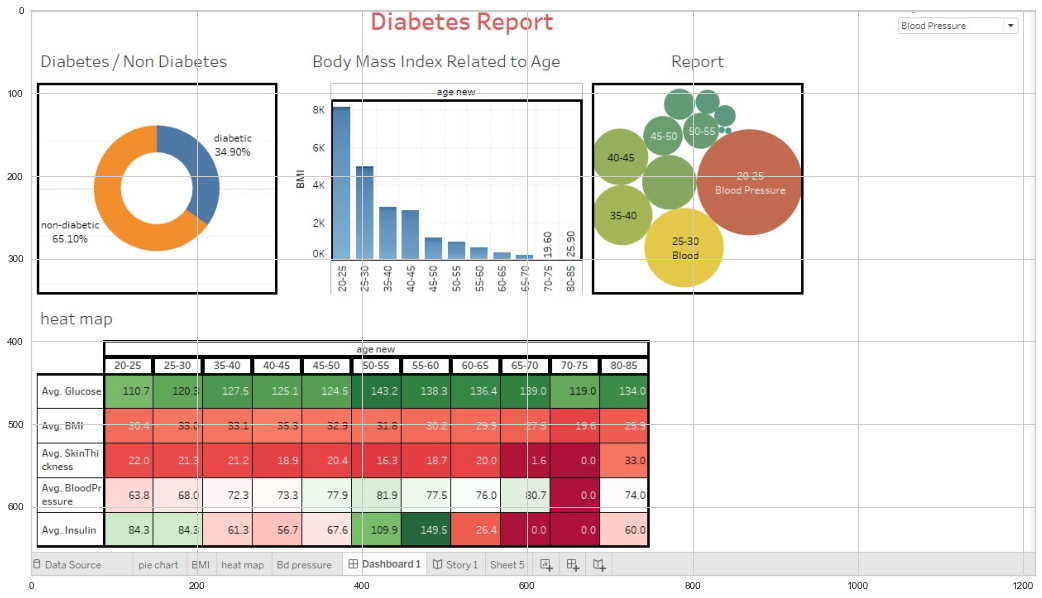

In [177]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
  
# Read Images 
img = mpimg.imread('r.jpg') 
  
# Output Images 
plt.figure(figsize = (18,12))
plt.imshow(img) 

https://public.tableau.com/profile/harsha1633#!/vizhome/majrproject/Dashboard1?publish=yes

# PROJECT BY HARSHA TEJA BOLLA